# Vent gate analysis

2024_aug23

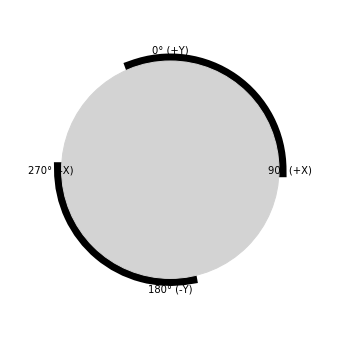

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(6, 6))

# Dibujar el círculo principal
circle = plt.Circle((0, 0), 1, color='lightgray', fill=True)
ax.add_artist(circle)

# Crear las franjas oscuras con líneas más gruesas
angles = [(180, 280), (0, 110)]

for start_angle, end_angle in angles:
    if start_angle > end_angle:
        # Dibujar el primer segmento
        theta1, theta2 = start_angle, 360
        ax.add_patch(Wedge((0, 0), 1, theta1=theta1, theta2=theta2, color='black', lw=15))
        
        # Dibujar el segundo segmento
        theta1, theta2 = 0, end_angle
        ax.add_patch(Wedge((0, 0), 1, theta1=theta1, theta2=theta2, color='black', lw=15))
    else:
        # Dibujar el segmento cuando no cruza el 0
        ax.add_patch(Wedge((0, 0), 1, theta1=start_angle, theta2=end_angle, color='black', lw=15))

# Configurar el eje con coordenadas claras
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal', 'box')
ax.axis('off')

# Agregar etiquetas para mayor claridad en las coordenadas
ax.text(0, 1.1, '0° (+Y)', ha='center', va='center')
ax.text(1.1, 0, '90° (+X)', ha='center', va='center')
ax.text(0, -1.1, '180° (-Y)', ha='center', va='center')
ax.text(-1.1, 0, '270° (-X)', ha='center', va='center')

# Mostrar el gráfico
plt.show()

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

La tabla mcs_az_el.csv contiene telescope az,el,eastVentgate,westVentgate,p2_seeing, windSpeed, windDir, 

In [72]:
df_p2= pd.read_csv('mcs_az_el.csv')

In [20]:
df_p2.head()

,Unnamed: 0,date,hour,datetime,ecs_az_pos,topshut_pos,botshut_pos,eastVent_pos,westVent_pos,pwfs2_see,windSp,windDir,dateB,HourB,datetimeB,mcs_el_pos
0,0,1/1/22,0:58:54,44562.04091,172.0,103.7,9.6,30.0,30.0,1.92,3.0,141.5,1/1/22,0:58:59,44562.04097,75.89
1,1,1/1/22,1:06:26,44562.04614,175.7,103.7,9.6,30.0,30.0,0.79,1.4,142.5,1/1/22,1:05:59,44562.04583,76.04
2,2,1/1/22,1:07:15,44562.04671,175.7,103.7,9.6,30.0,30.0,0.86,1.4,141.5,1/1/22,1:07:00,44562.04653,76.05
3,3,1/1/22,1:08:05,44562.04729,175.7,103.7,9.6,30.0,30.0,0.96,1.4,144.0,1/1/22,1:07:59,44562.04722,76.06
4,4,1/1/22,1:08:55,44562.04787,175.7,103.7,9.6,30.0,30.0,0.86,1.4,138.0,1/1/22,1:09:00,44562.04792,76.07


In [21]:
df_p2.describe()

,Unnamed: 0,datetime,ecs_az_pos,topshut_pos,botshut_pos,eastVent_pos,westVent_pos,pwfs2_see,windSp,windDir,datetimeB,mcs_el_pos
count,35152.000000,35152.000000,35152.000000,35152.000000,35152.000000,35152.000000,35152.000000,35152.000000,35152.000000,35152.000000,35152.000000,35152.000000
mean,17575.500000,44682.781550,170.383147,90.621067,21.204353,36.104418,40.300609,0.879263,6.030445,270.296566,44682.771206,59.906250
std,10147.652668,51.262260,90.991791,20.118471,15.948523,32.384994,32.426232,0.373989,4.170896,72.639026,51.273481,13.583851
min,0.000000,44562.040910,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,-0.100000,44562.040970,27.620000
25%,8787.750000,44645.161173,93.950000,83.300000,10.300000,10.000000,10.000000,0.600000,2.700000,283.000000,44645.161110,47.270000
50%,17575.500000,44688.049355,167.750000,102.900000,16.000000,25.000000,30.000000,0.800000,5.600000,300.000000,44688.049350,57.990000
75%,26363.250000,44723.105325,240.000000,103.600000,29.100000,60.000000,60.000000,1.100000,8.500000,308.000000,44723.105403,68.950000
max,35151.000000,44772.223220,359.000000,104.000000,60.000000,100.000000,100.000000,2.000000,39.200000,356.000000,44772.223110,90.050000


## Plotting histogram

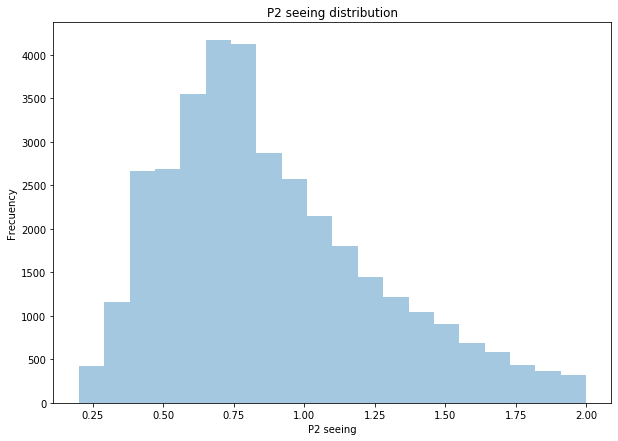

In [22]:
plt.figure(figsize=(10, 7))  # Ancho=10 pulgadas, Altura=7 pulgadas
sns.distplot(df_p2['pwfs2_see'], kde=False, bins=20)
plt.title('P2 seeing distribution')
plt.xlabel('P2 seeing')
plt.ylabel('Frecuency')
plt.show()

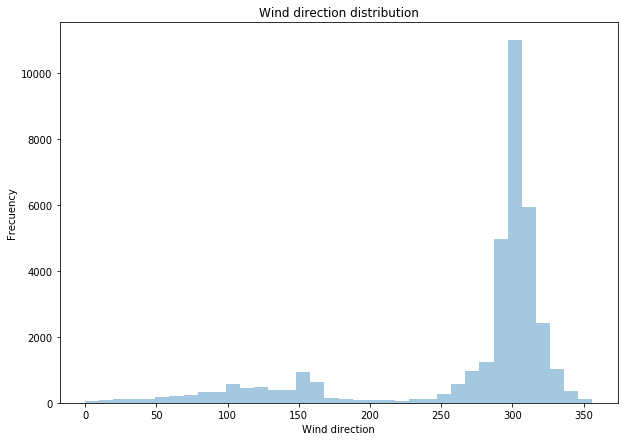

In [60]:
plt.figure(figsize=(10, 7))  # Ancho=10 pulgadas, Altura=7 pulgadas
sns.distplot(df_p2['windDir'], kde=False, bins=36)
plt.title('Wind direction distribution')
plt.xlabel('Wind direction')
plt.ylabel('Frecuency')
plt.show()

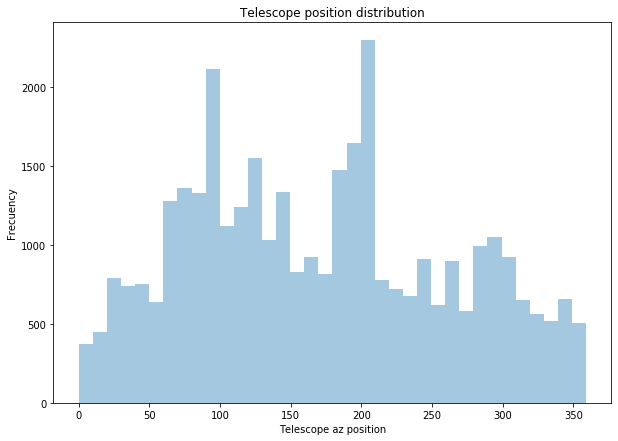

In [73]:
plt.figure(figsize=(10, 7))  # Ancho=10 pulgadas, Altura=7 pulgadas
sns.distplot(df_p2['ecs_az_pos'], bins=36, kde= False)
plt.title('Telescope position distribution')
plt.xlabel('Telescope az position')
plt.ylabel('Frecuency')
plt.show()

In [11]:
#bins = [0, 9.99, 19.99, 29.99, 39.99, 49.99, 59.99, 69.99, 79.99, 89.99, 100]
bins = [0,4.99,9.99,14.99,19.99,

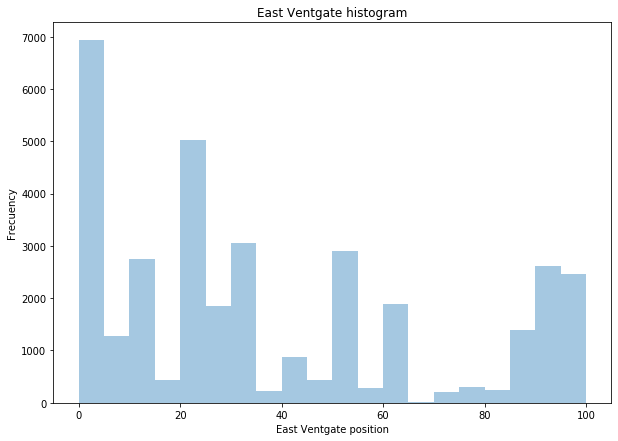

In [14]:
plt.figure(figsize=(10, 7))  # Ancho=10 pulgadas, Altura=7 pulgadas
sns.distplot(df_p2['eastVent_pos'], bins=20, kde=False)
plt.title('East Ventgate histogram')
plt.xlabel('East Ventgate position')
plt.ylabel('Frecuency')
plt.show()

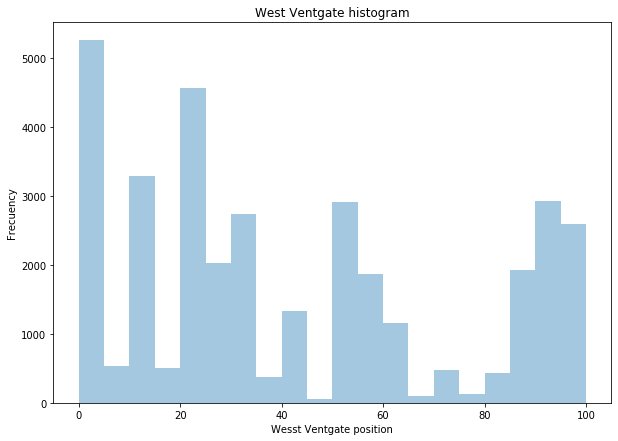

In [15]:
plt.figure(figsize=(10, 7))  # Ancho=10 pulgadas, Altura=7 pulgadas
sns.distplot(df_p2['westVent_pos'], bins=20, kde=False)
plt.title('West Ventgate histogram')
plt.xlabel('Wesst Ventgate position')
plt.ylabel('Frecuency')
plt.show()

In [26]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('mcs_az_el.csv')

# Filtrar las filas donde windSp es igual a cero o mayor a 20
df_filtrado = df[(df['windSp'] != 0) & (df['windSp'] <= 20) ]

# Verificar si el DataFrame filtrado no está vacío
if not df_filtrado.empty:
    # Eliminar las filas usando drop
    df = df.drop(df.index.difference(df_filtrado.index))

    # Mostrar el DataFrame filtrado para verificar
    print('df no esta vacio, ver tabla_wind20_filtrado.csv')
else:
    print("No se encontraron filas para filtrar o eliminar.")

# Guardar el DataFrame filtrado en un nuevo archivo CSV (opcional)
df.to_csv('mcs_az_el_wind20.csv', index=False)

df no esta vacio, ver tabla_wind20_filtrado.csv


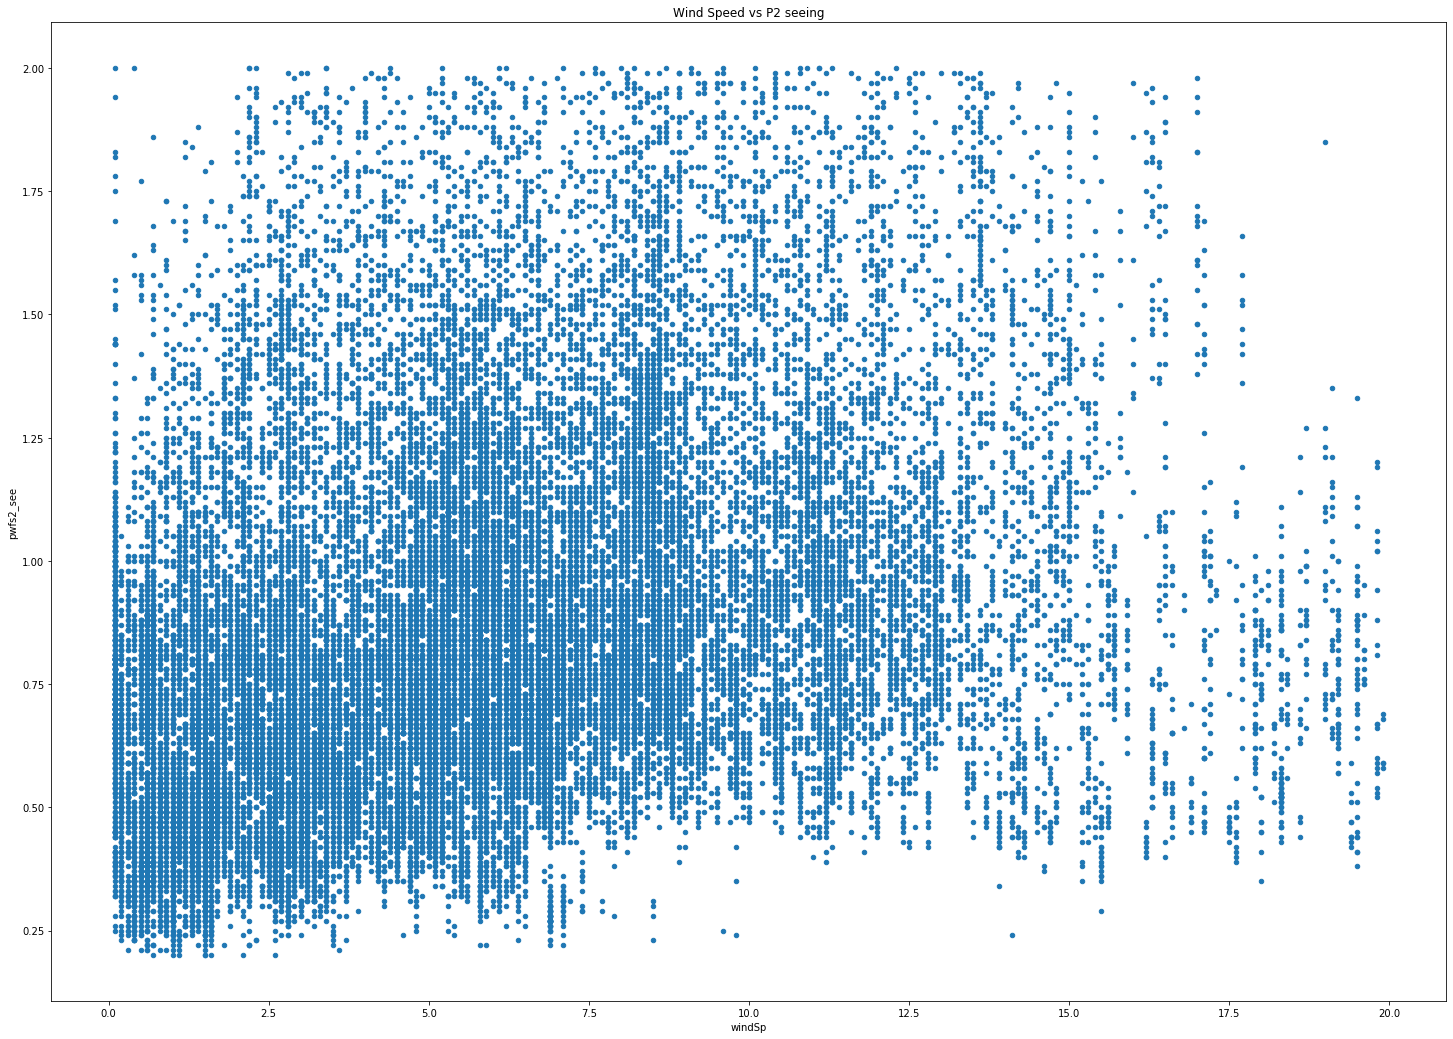

In [27]:
df.plot.scatter(x='windSp', y='pwfs2_see', title='Wind Speed vs P2 seeing', figsize=(25, 18) )

In [24]:
import statsmodels.api as sm

definir variables dependientes (y), y variables independientes (x)

In [12]:
df20 = pd.read_csv('mcs_az_el_wind20.csv')

In [13]:
df20.head()

,id,date,hour,datetime,ecs_az_pos,topshut_pos,botshut_pos,eastVent_pos,westVent_pos,pwfs2_see,windSp,windDir,dateB,HourB,datetimeB,mcs_el_pos
0,0,1/1/22,0:58:54,44562.04091,172.0,103.7,9.6,30.0,30.0,1.92,3.0,141.5,1/1/22,0:58:59,44562.04097,75.89
1,1,1/1/22,1:06:26,44562.04614,175.7,103.7,9.6,30.0,30.0,0.79,1.4,142.5,1/1/22,1:05:59,44562.04583,76.04
2,2,1/1/22,1:07:15,44562.04671,175.7,103.7,9.6,30.0,30.0,0.86,1.4,141.5,1/1/22,1:07:00,44562.04653,76.05
3,3,1/1/22,1:08:05,44562.04729,175.7,103.7,9.6,30.0,30.0,0.96,1.4,144.0,1/1/22,1:07:59,44562.04722,76.06
4,4,1/1/22,1:08:55,44562.04787,175.7,103.7,9.6,30.0,30.0,0.86,1.4,138.0,1/1/22,1:09:00,44562.04792,76.07


In [14]:
df20.describe()

,id,datetime,ecs_az_pos,topshut_pos,botshut_pos,eastVent_pos,westVent_pos,pwfs2_see,windSp,windDir,datetimeB,mcs_el_pos
count,34511.000000,34511.000000,34511.000000,34511.000000,34511.000000,34511.000000,34511.000000,34511.000000,34511.000000,34511.000000,34511.000000,34511.000000
mean,17280.052070,44681.221805,169.796210,90.759283,20.909690,36.740619,40.989742,0.871433,6.102727,272.150934,44681.210535,59.773201
std,10002.128885,50.408055,91.465324,20.100275,15.737453,32.324464,32.293370,0.370744,4.064000,71.770523,50.417896,13.524124
min,0.000000,44562.040910,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.100000,-0.100000,44562.040970,27.620000
25%,8627.500000,44645.105225,93.950000,83.600000,10.300000,10.000000,15.000000,0.600000,2.800000,286.000000,44645.105210,47.270000
50%,17255.000000,44687.018060,167.200000,102.900000,15.900000,25.000000,30.000000,0.800000,5.600000,300.000000,44687.018060,57.990000
75%,25902.500000,44722.137985,240.000000,103.700000,27.900000,60.000000,60.000000,1.080000,8.600000,308.000000,44722.137930,68.950000
max,35151.000000,44772.223220,359.000000,104.000000,60.000000,100.000000,100.000000,2.000000,19.900000,356.000000,44772.223110,90.050000


In [29]:
y=df20['pwfs2_see']
x=df20['windSp']

Agregar constante y ajustar modelo

In [30]:
x=sm.add_constant(x)
lm=sm.OLS(y,x).fit()

/Users/pcandia/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [31]:
lm.predict(x)

0        0.786849
1        0.743231
2        0.743231
3        0.743231
4        0.743231
           ...   
34506    1.152151
34507    1.152151
34508    1.152151
34509    1.152151
34510    1.029475
Length: 34511, dtype: float64

La tabla de regresion

In [32]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              pwfs2_see   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     3384.
Date:                Thu, 29 Aug 2024   Prob (F-statistic):               0.00
Time:                        20:59:42   Log-Likelihood:                -13111.
No. Observations:               34511   AIC:                         2.623e+04
Df Residuals:                   34509   BIC:                         2.624e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7051      0.003    205.192      0.000       0.698       0.712
windSp         0.0273      0.000     58.171      0.000       0.026       0.028
==============================================================================
Omnibus:                     3093.321   Durbin-Watson:                   0.303
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3987.340
Skew:                           0.820   Prob(JB):                         0.00
Kurtosis:                       3.287   Cond. No.                         13.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

linear regression equation


In [35]:
#Coeficiente WindSpeed_mean: 0.0752
#Coeficiente Constante: 0.0242
#y=ax+b
y_pred= 0.0273*x['windSp']+0.7051

Plotting line

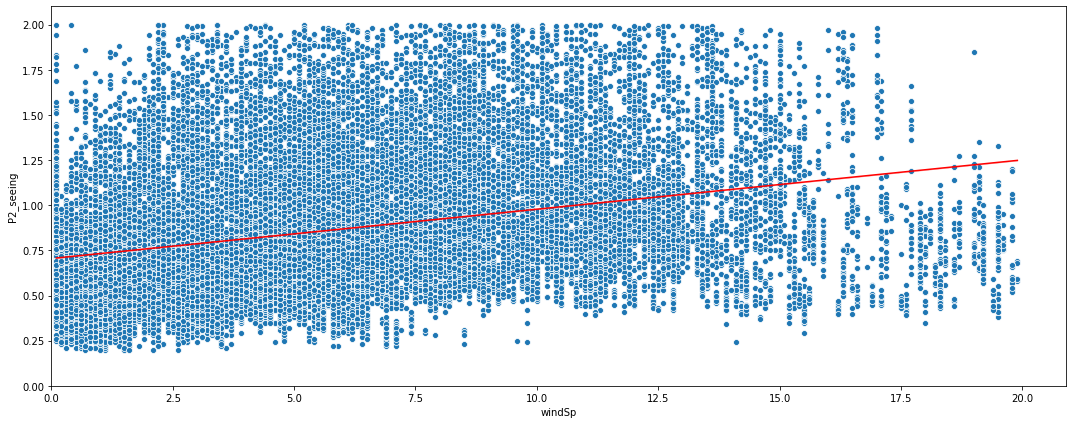

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
#graficar los puntos
plt.figure(figsize=(15,6), tight_layout=True)
sns.scatterplot(x=x['windSp'],y=y)
#Graficar linea
sns.lineplot(x=x['windSp'],y=y_pred, color='red')
plt.ylabel('P2_seeing')
plt.xlim(0)
plt.ylim(0)
plt.show()

Archivo 'mcs_az_el_wind20.csv' leído exitosamente.
Categorías de velocidad del viento asignadas.
Cantidad de filas después de eliminar NaN: 34339
Cálculo de la media y error estándar completado.
  windSp_interval      mean       std  count  error_std
0           [0-1)  0.655948  0.275042   2678   0.005315
1           [1-3)  0.720829  0.337056   6512   0.004177
2           [3-5)  0.814799  0.359887   5482   0.004861
3           [5-7)  0.887360  0.346729   7160   0.004098
4           [7-9)  0.993288  0.351798   5210   0.004874
5          [9-11)  1.051823  0.373041   2814   0.007032
6         [11-13)  1.013668  0.350908   2467   0.007065
7         [13-15)  1.072226  0.406129   1159   0.011930
8         [15-17)  0.983462  0.419058    517   0.018430
9         [17-19)  0.820441  0.324115    340   0.017578


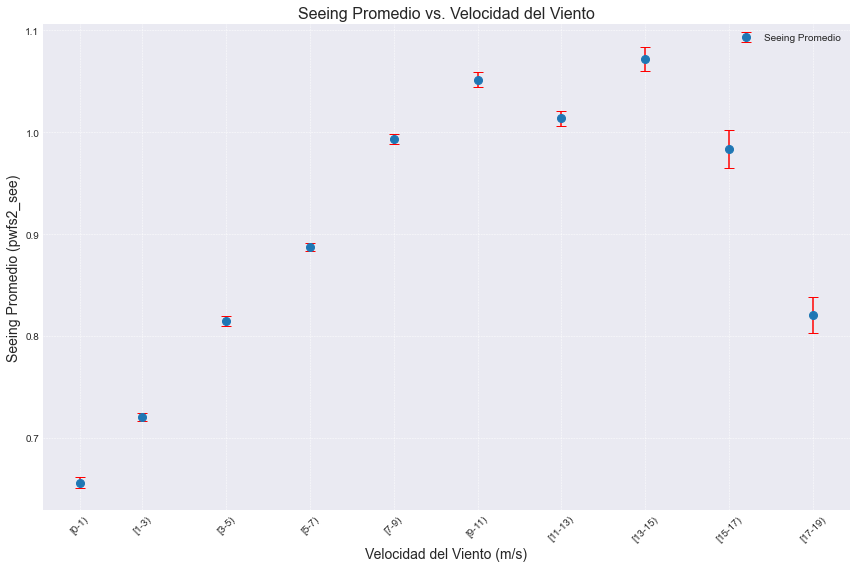

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Configuración de estilo de los gráficos
plt.style.use('seaborn-darkgrid')

def calcular_y_graficar_seeing_promedio(
    archivo_csv='mcs_az_el_wind20.csv'
):
    """
    Calcula el seeing promedio y su error estándar en intervalos de velocidad del viento
    y genera un gráfico de dispersión con barras de error.
    
    Parámetros:
    - archivo_csv: Nombre del archivo CSV a leer.
    """
    
    # 1. Leer el archivo CSV
    try:
        df = pd.read_csv(archivo_csv)
        print(f"Archivo '{archivo_csv}' leído exitosamente.")
    except FileNotFoundError:
        print(f"El archivo '{archivo_csv}' no se encontró.")
        return
    except Exception as e:
        print(f"Ocurrió un error al leer el archivo: {e}")
        return
    
    # 2. Verificar si las columnas necesarias existen
    columnas_necesarias = ['pwfs2_see', 'windSp']
    for columna in columnas_necesarias:
        if columna not in df.columns:
            print(f"Columna '{columna}' no encontrada en el archivo CSV.")
            return
    
    # 3. Definir los intervalos de velocidad del viento
    bins = [0, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
    labels = ['[0-1)', '[1-3)', '[3-5)', '[5-7)', '[7-9)', '[9-11)', '[11-13)', '[13-15)', '[15-17)', '[17-19)']
    
    # 4. Categorizar la velocidad del viento en los intervalos definidos
    df['windSp_interval'] = pd.cut(
        df['windSp'],
        bins=bins,
        labels=labels,
        right=False,          # Exclusivo del límite derecho
        include_lowest=True   # Incluye el límite inferior en el primer intervalo
    )
    
    print("Categorías de velocidad del viento asignadas.")
    
    # 5. Eliminar filas con NaN en 'windSp_interval' o 'pwfs2_see'
    df_clean = df.dropna(subset=['windSp_interval', 'pwfs2_see'])
    print(f"Cantidad de filas después de eliminar NaN: {len(df_clean)}")
    
    # 6. Agrupar por los intervalos de velocidad del viento y calcular la media y el error estándar del seeing
    agrupado = df_clean.groupby('windSp_interval')['pwfs2_see'].agg(['mean', 'std', 'count']).reset_index()
    
    # Calcular el error estándar
    agrupado['error_std'] = agrupado['std'] / np.sqrt(agrupado['count'])
    
    print("Cálculo de la media y error estándar completado.")
    print(agrupado)
    
    # 7. Crear el gráfico de dispersión con barras de error
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Convertir los intervalos en números para el eje X
    # Tomamos el punto medio de cada intervalo para una representación más clara
    interval_midpoints = [(bins[i] + bins[i+1])/2 for i in range(len(bins)-1)]
    agrupado['midpoint'] = interval_midpoints
    
    # Graficar
    ax.errorbar(
        agrupado['midpoint'],
        agrupado['mean'],
        yerr=agrupado['error_std'],
        fmt='o',
        ecolor='red',
        capsize=5,
        markersize=8,
        label='Seeing Promedio'
    )
    
    # Configurar etiquetas y título
    ax.set_xlabel('Velocidad del Viento (m/s)', fontsize=14)
    ax.set_ylabel('Seeing Promedio (pwfs2_see)', fontsize=14)
    ax.set_title('Seeing Promedio vs. Velocidad del Viento', fontsize=16)
    
    # Configurar las etiquetas del eje X con los intervalos
    ax.set_xticks(agrupado['midpoint'])
    ax.set_xticklabels(agrupado['windSp_interval'], rotation=45)
    
    # Añadir leyenda
    ax.legend()
    
    # Añadir grid
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Ajustar layout para mejor visualización
    plt.tight_layout()
    
    # Mostrar el gráfico
    plt.show()

# Ejemplo de uso:
calcular_y_graficar_seeing_promedio(
    archivo_csv='mcs_az_el_wind20.csv'
)


## Wind speed vs P2 mean analysis

Calculating airmass and entering this value into the table 'p2mean_az_el_wind20_with_AM.csv'

In [ ]:
import pandas as pd
import numpy as np

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20.csv'  # Reemplaza con la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Calcular el ángulo cenital z = 90 - mcs_el_pos
df['zenith_angle'] = 90 - df['mcs_el_pos']

# Calcular la masa de aire AM = 1 / cos(z)
df['AM'] = 1 / np.cos(np.radians(df['zenith_angle']))

# Guardar el resultado en un nuevo archivo CSV (opcional)
output_file = 'p2mean_az_el_wind20_with_AM.csv'
df.to_csv(output_file, index=False)

# Mostrar las primeras filas del DataFrame para verificar
#print(df[['mcs_el_pos', 'zenith_angle', 'AM']].head())

### Wind Direction [280-320] , Telescope Position in Azimuth [80-160]

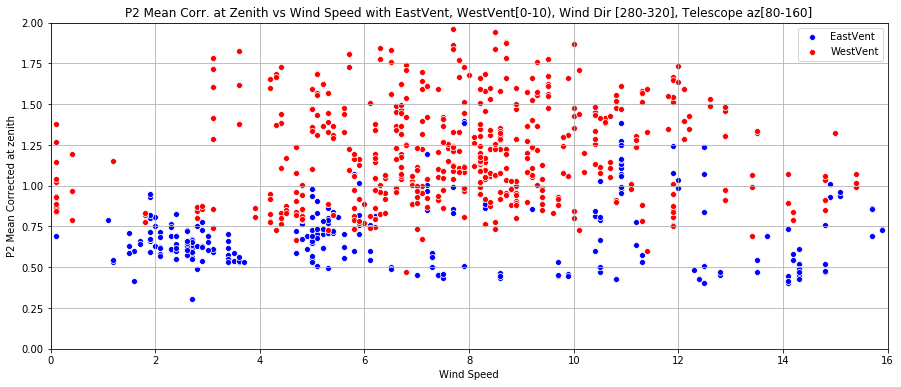

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20_AM_IQ_zenith.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 0) & (df['eastVent'] < 10) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=80) & (df['ecs_az'] <=160)]

filtered_df_west = df[(df['westVent'] >= 0) & (df['westVent'] < 10) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=80) & (df['ecs_az'] <=160)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean Corrected at zenith')
plt.title('P2 Mean Corr. at Zenith vs Wind Speed with EastVent, WestVent[0-10), Wind Dir [280-320], Telescope az[80-160]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

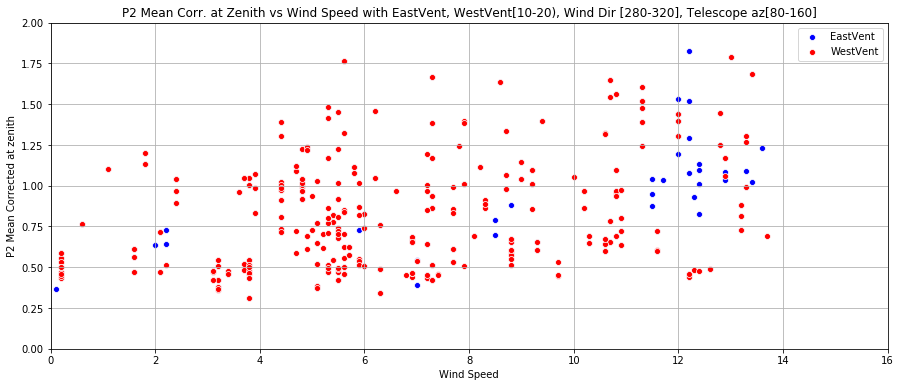

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20_AM_IQ_zenith.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 10) & (df['eastVent'] < 20) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=80) & (df['ecs_az'] <=160)]

filtered_df_west = df[(df['westVent'] >= 10) & (df['westVent'] < 20) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=80) & (df['ecs_az'] <=160)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean Corrected at zenith')
plt.title('P2 Mean Corr. at Zenith vs Wind Speed with EastVent, WestVent[10-20), Wind Dir [280-320], Telescope az[80-160]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

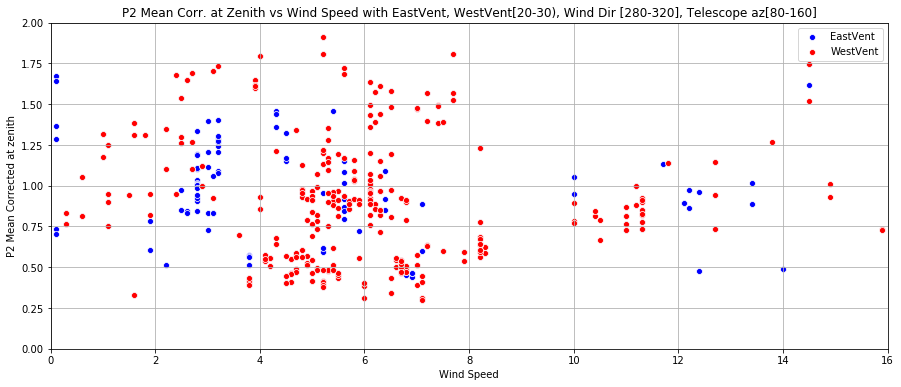

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20_AM_IQ_zenith.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 20) & (df['eastVent'] < 30) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=80) & (df['ecs_az'] <=160)]

filtered_df_west = df[(df['westVent'] >= 20) & (df['westVent'] < 30) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=80) & (df['ecs_az'] <=160)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean Corrected at zenith')
plt.title('P2 Mean Corr. at Zenith vs Wind Speed with EastVent, WestVent[20-30), Wind Dir [280-320], Telescope az[80-160]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

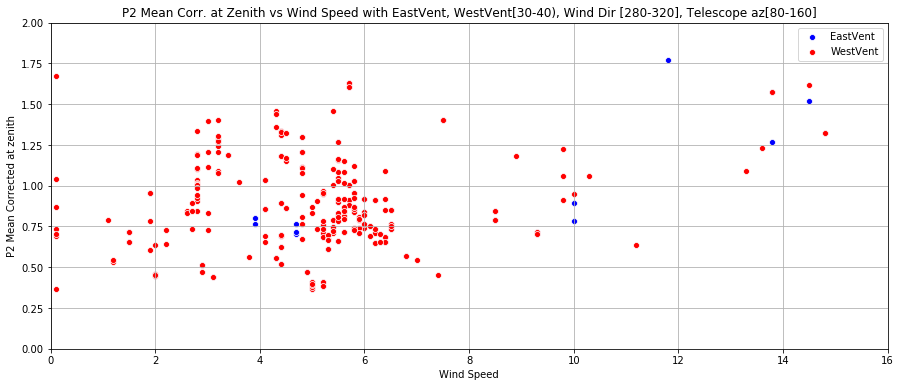

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20_AM_IQ_zenith.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 30) & (df['eastVent'] < 40) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=80) & (df['ecs_az'] <=160)]

filtered_df_west = df[(df['westVent'] >= 30) & (df['westVent'] < 40) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=80) & (df['ecs_az'] <=160)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean Corrected at zenith')
plt.title('P2 Mean Corr. at Zenith vs Wind Speed with EastVent, WestVent[30-40), Wind Dir [280-320], Telescope az[80-160]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

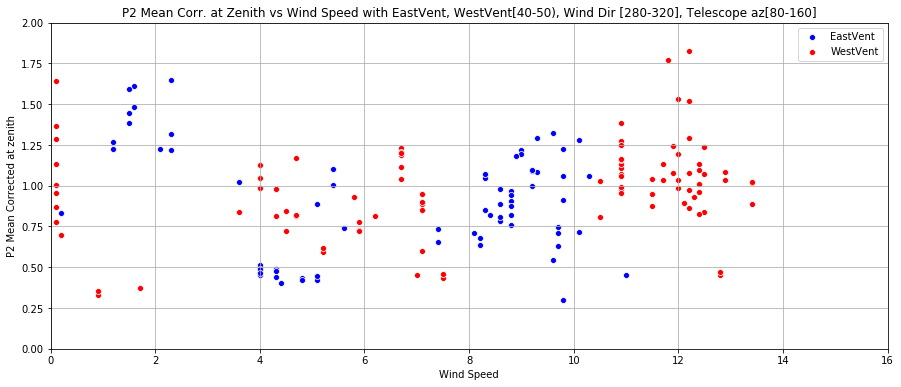

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20_AM_IQ_zenith.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 40) & (df['eastVent'] < 50) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=80) & (df['ecs_az'] <=160)]

filtered_df_west = df[(df['westVent'] >= 40) & (df['westVent'] < 50) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=80) & (df['ecs_az'] <=160)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean Corrected at zenith')
plt.title('P2 Mean Corr. at Zenith vs Wind Speed with EastVent, WestVent[40-50), Wind Dir [280-320], Telescope az[80-160]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

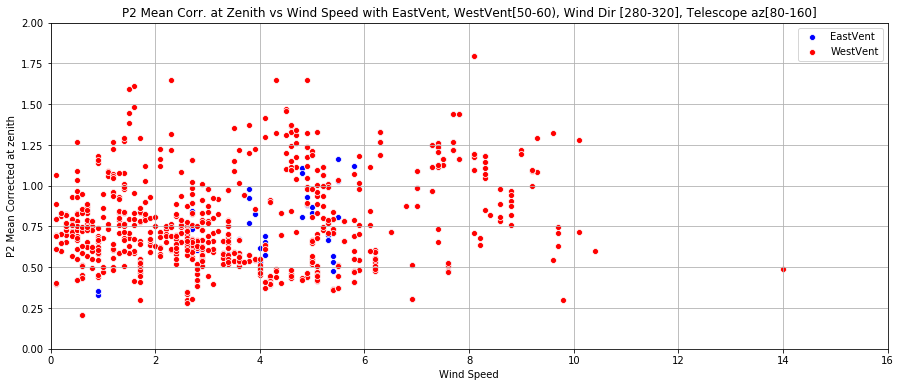

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20_AM_IQ_zenith.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 50) & (df['eastVent'] < 60) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=80) & (df['ecs_az'] <=160)]

filtered_df_west = df[(df['westVent'] >= 50) & (df['westVent'] < 60) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=80) & (df['ecs_az'] <=160)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean Corrected at zenith')
plt.title('P2 Mean Corr. at Zenith vs Wind Speed with EastVent, WestVent[50-60), Wind Dir [280-320], Telescope az[80-160]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

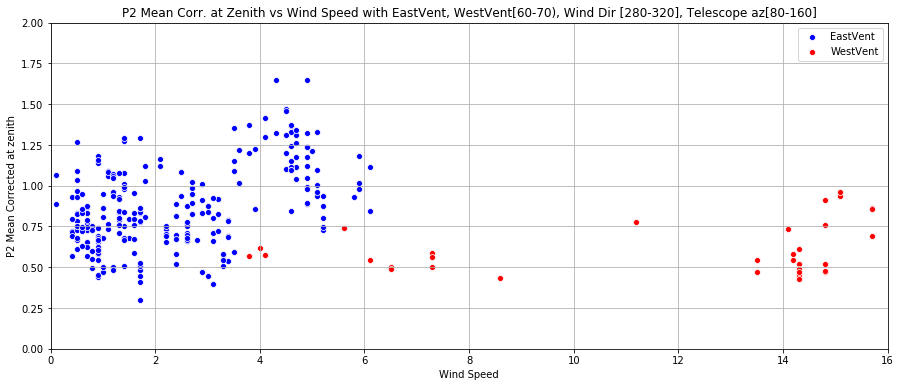

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20_AM_IQ_zenith.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 60) & (df['eastVent'] < 70) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=80) & (df['ecs_az'] <=160)]

filtered_df_west = df[(df['westVent'] >= 60) & (df['westVent'] < 70) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=80) & (df['ecs_az'] <=160)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean Corrected at zenith')
plt.title('P2 Mean Corr. at Zenith vs Wind Speed with EastVent, WestVent[60-70), Wind Dir [280-320], Telescope az[80-160]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

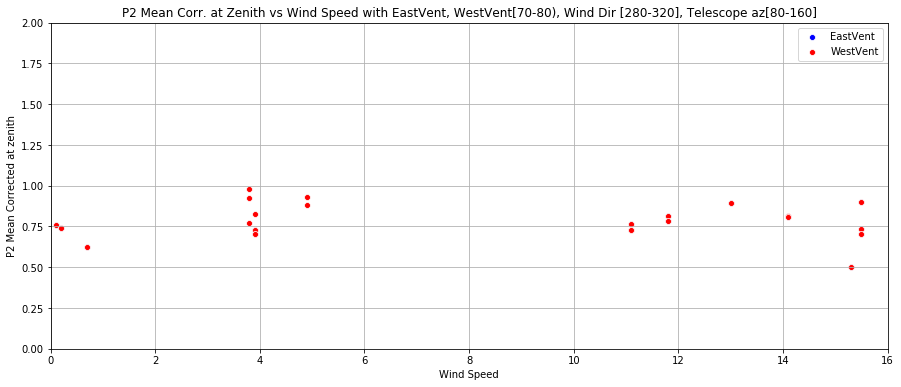

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20_AM_IQ_zenith.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 70) & (df['eastVent'] < 80) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=80) & (df['ecs_az'] <=160)]

filtered_df_west = df[(df['westVent'] >= 70) & (df['westVent'] < 80) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=80) & (df['ecs_az'] <=160)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean Corrected at zenith')
plt.title('P2 Mean Corr. at Zenith vs Wind Speed with EastVent, WestVent[70-80), Wind Dir [280-320], Telescope az[80-160]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

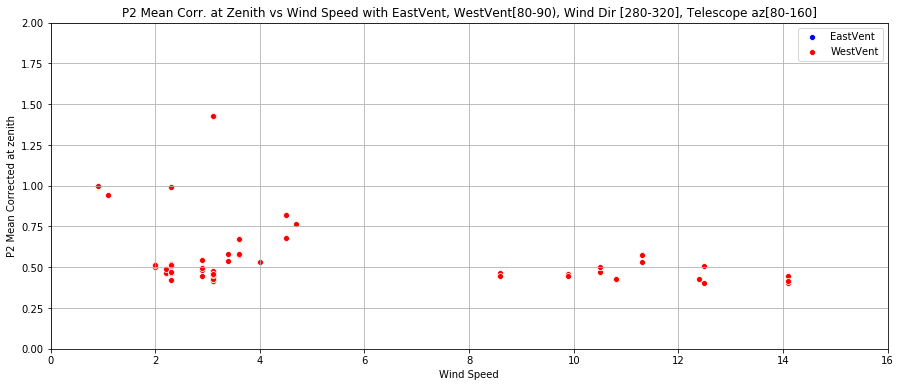

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20_AM_IQ_zenith.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 80) & (df['eastVent'] < 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=80) & (df['ecs_az'] <=160)]

filtered_df_west = df[(df['westVent'] >= 80) & (df['westVent'] < 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=80) & (df['ecs_az'] <=160)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean Corrected at zenith')
plt.title('P2 Mean Corr. at Zenith vs Wind Speed with EastVent, WestVent[80-90), Wind Dir [280-320], Telescope az[80-160]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

In [35]:
#((df['topshut']) - (df['botshut'])) > 20

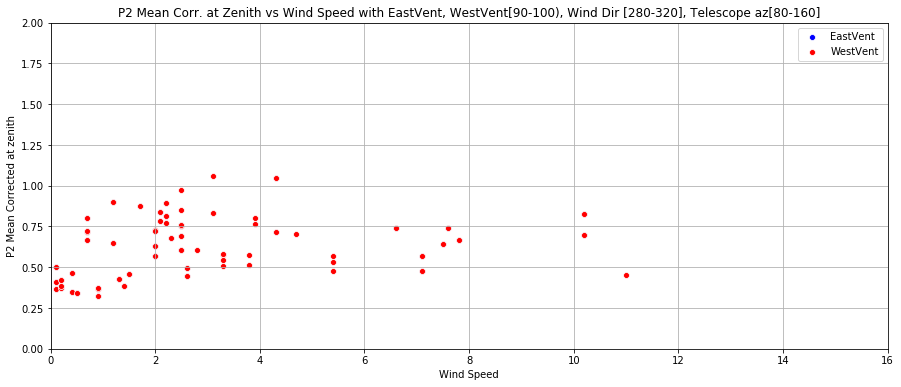

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20_AM_IQ_zenith.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 90) & (df['eastVent'] < 100) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=80) & (df['ecs_az'] <=160) ]

filtered_df_west = df[(df['westVent'] >= 90) & (df['westVent'] < 100) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=80) & (df['ecs_az'] <=160) ]
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean Corrected at zenith')
plt.title('P2 Mean Corr. at Zenith vs Wind Speed with EastVent, WestVent[90-100), Wind Dir [280-320], Telescope az[80-160]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

Correlation Matrix

In [28]:
import pandas as pd

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20_AM_IQ_zenith.csv'
df = pd.read_csv(file_path)

# Aplicar restricciones: windSpeed < 13, eastVent < 5, westVent < 5
df_filtered = df[(df['windSpeed'] < 13) & (df['eastVent'] < 5) & (df['westVent'] < 5)]

# Calcular la matriz de correlación para los datos filtrados
corr_matrix = df_filtered[['windSpeed', 'IQ_zenith', 'eastVent', 'westVent']].corr()

# Imprimir la matriz de correlación
print(corr_matrix)

           windSpeed  IQ_zenith  eastVent  westVent
windSpeed   1.000000   0.283618  0.063080  0.079113
IQ_zenith   0.283618   1.000000  0.030348 -0.011033
eastVent    0.063080   0.030348  1.000000  0.690310
westVent    0.079113  -0.011033  0.690310  1.000000


Multiple Lineal Regression 

In [23]:
from sklearn.linear_model import LinearRegression
file_path = 'p2mean_az_el_wind20_AM_IQ_zenith.csv'
df = pd.read_csv(file_path)
# Definir variables dependientes e independientes
X = df[['windSpeed', 'eastVent', 'westVent']]
y = df['IQ_zenith']

# Ajustar el modelo
model = LinearRegression()
model.fit(X, y)

# Ver los coeficientes de la regresión
print(f"Coeficientes: {model.coef_}")
print(f"Intercepto: {model.intercept_}")

Coeficientes: [ 0.01922522  0.00119358 -0.0042205 ]
Intercepto: 0.8123931652755879


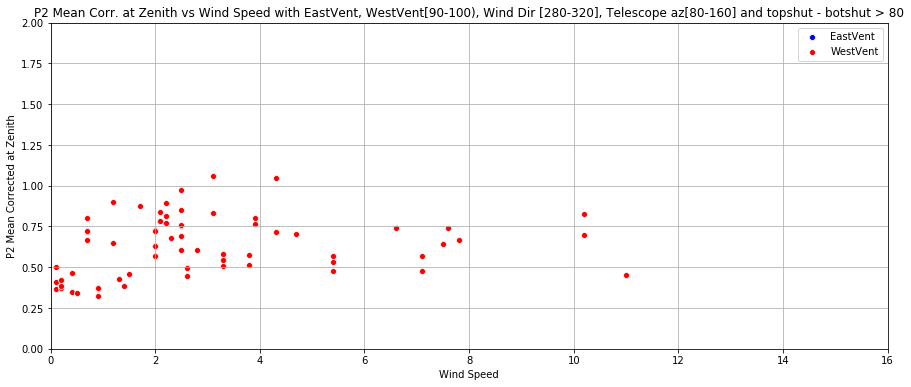

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20_AM_IQ_zenith.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent', 'mcs_el_pos' y la nueva condición 'topshut' - 'botshut' > 80
filtered_df_east = df[(df['eastVent'] >= 90) & (df['eastVent'] < 100) &
                      (df['windDir'] >= 280) & (df['windDir'] <= 320) &
                      (df['ecs_az'] >= 80) & (df['ecs_az'] <= 160) &
                      (df['topshut'] - df['botshut'] > 80)]

filtered_df_west = df[(df['westVent'] >= 90) & (df['westVent'] < 100) &
                      (df['windDir'] >= 280) & (df['windDir'] <= 320) &
                      (df['ecs_az'] >= 80)  &(df['ecs_az'] <= 160)]

# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean Corrected at Zenith')
plt.title('P2 Mean Corr. at Zenith vs Wind Speed with EastVent, WestVent[90-100), Wind Dir [280-320], Telescope az[80-160] and topshut - botshut > 80')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

## Wind Direction [280-320] , Telescope Position in Azimuth [260-340]

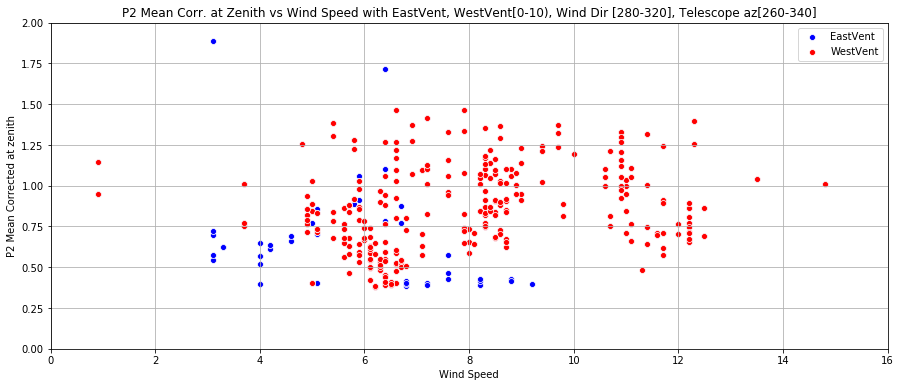

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20_AM_IQ_zenith.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 0) & (df['eastVent'] < 10) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=260) & (df['ecs_az'] <=340)]

filtered_df_west = df[(df['westVent'] >= 0) & (df['westVent'] < 10) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=260) & (df['ecs_az'] <=340)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean Corrected at zenith')
plt.title('P2 Mean Corr. at Zenith vs Wind Speed with EastVent, WestVent[0-10), Wind Dir [280-320], Telescope az[260-340]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

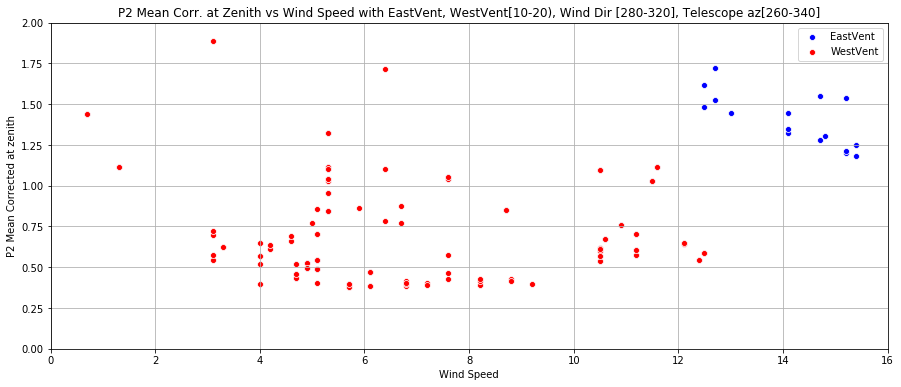

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20_AM_IQ_zenith.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 10) & (df['eastVent'] < 20) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=260) & (df['ecs_az'] <=340)]

filtered_df_west = df[(df['westVent'] >= 10) & (df['westVent'] < 20) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=260) & (df['ecs_az'] <=340)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean Corrected at zenith')
plt.title('P2 Mean Corr. at Zenith vs Wind Speed with EastVent, WestVent[10-20), Wind Dir [280-320], Telescope az[260-340]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

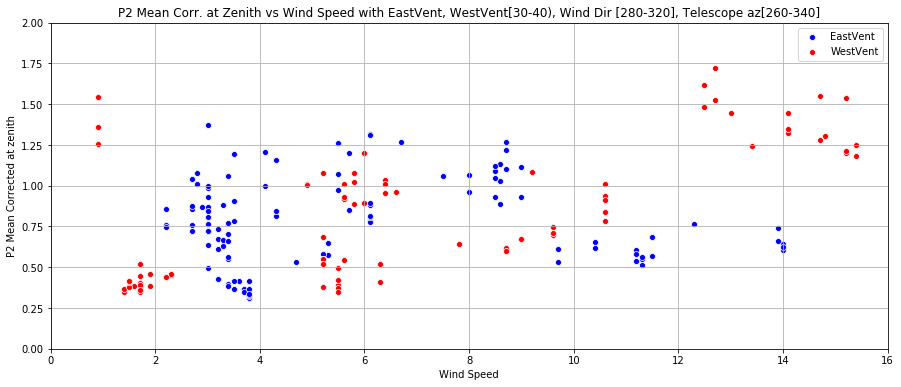

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20_AM_IQ_zenith.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 30) & (df['eastVent'] < 40) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=260) & (df['ecs_az'] <=340)]

filtered_df_west = df[(df['westVent'] >= 30) & (df['westVent'] < 40) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=260) & (df['ecs_az'] <=340)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean Corrected at zenith')
plt.title('P2 Mean Corr. at Zenith vs Wind Speed with EastVent, WestVent[30-40), Wind Dir [280-320], Telescope az[260-340]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

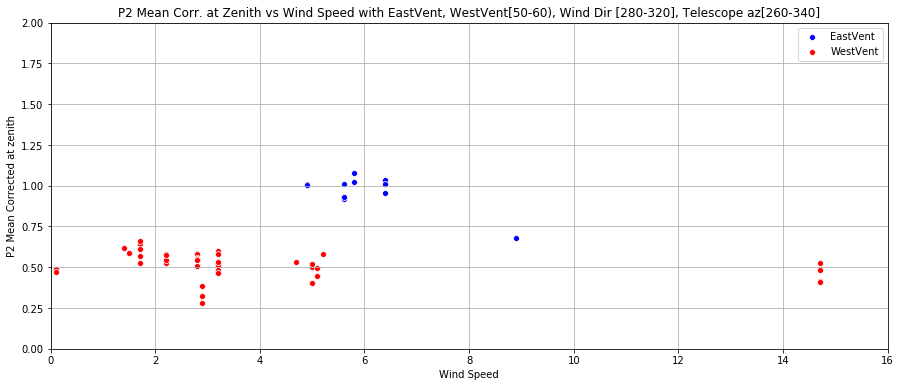

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20_AM_IQ_zenith.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 50) & (df['eastVent'] < 60) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=260) & (df['ecs_az'] <=340)]

filtered_df_west = df[(df['westVent'] >= 50) & (df['westVent'] < 60) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=260) & (df['ecs_az'] <=340)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean Corrected at zenith')
plt.title('P2 Mean Corr. at Zenith vs Wind Speed with EastVent, WestVent[50-60), Wind Dir [280-320], Telescope az[260-340]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

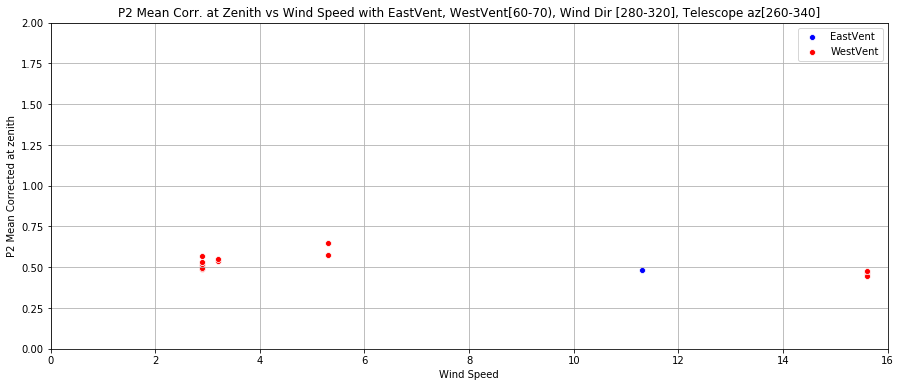

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20_AM_IQ_zenith.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 60) & (df['eastVent'] < 70) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=260) & (df['ecs_az'] <=340)]

filtered_df_west = df[(df['westVent'] >= 60) & (df['westVent'] < 70) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=260) & (df['ecs_az'] <=340)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean Corrected at zenith')
plt.title('P2 Mean Corr. at Zenith vs Wind Speed with EastVent, WestVent[60-70), Wind Dir [280-320], Telescope az[260-340]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

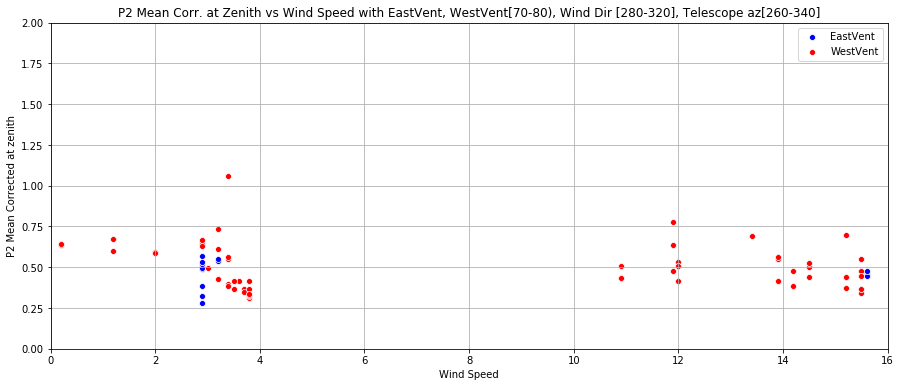

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20_AM_IQ_zenith.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 70) & (df['eastVent'] < 80) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=260) & (df['ecs_az'] <=340)]

filtered_df_west = df[(df['westVent'] >= 70) & (df['westVent'] < 80) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=260) & (df['ecs_az'] <=340)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean Corrected at zenith')
plt.title('P2 Mean Corr. at Zenith vs Wind Speed with EastVent, WestVent[70-80), Wind Dir [280-320], Telescope az[260-340]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

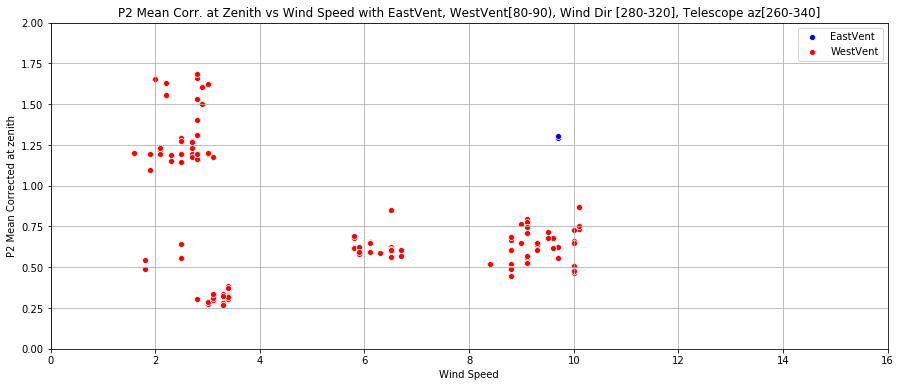

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20_AM_IQ_zenith.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 80) & (df['eastVent'] < 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=260) & (df['ecs_az'] <=340)]

filtered_df_west = df[(df['westVent'] >= 80) & (df['westVent'] < 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=260) & (df['ecs_az'] <=340)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean Corrected at zenith')
plt.title('P2 Mean Corr. at Zenith vs Wind Speed with EastVent, WestVent[80-90), Wind Dir [280-320], Telescope az[260-340]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

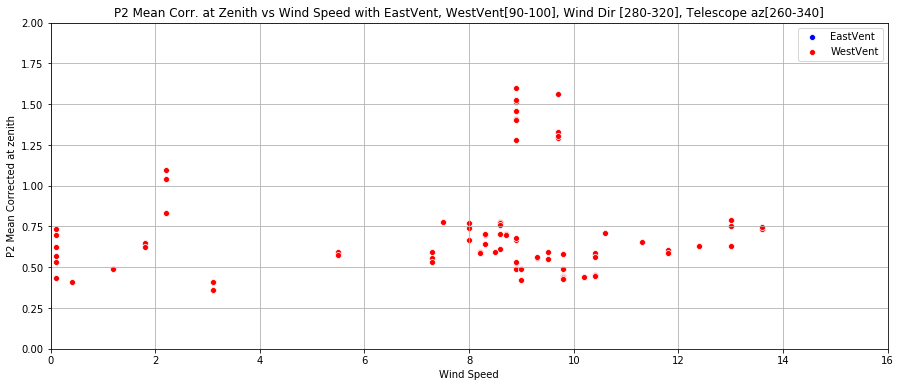

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20_AM_IQ_zenith.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 90) & (df['eastVent'] <= 100) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=260) & (df['ecs_az'] <=340)]

filtered_df_west = df[(df['westVent'] >= 90) & (df['westVent'] <= 100) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=260) & (df['ecs_az'] <=340)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean Corrected at zenith')
plt.title('P2 Mean Corr. at Zenith vs Wind Speed with EastVent, WestVent[90-100], Wind Dir [280-320], Telescope az[260-340]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

## P2 Mean Corr at Zenith vs Wind Speed. Wind direction [280-320], Telescope az[190-230]

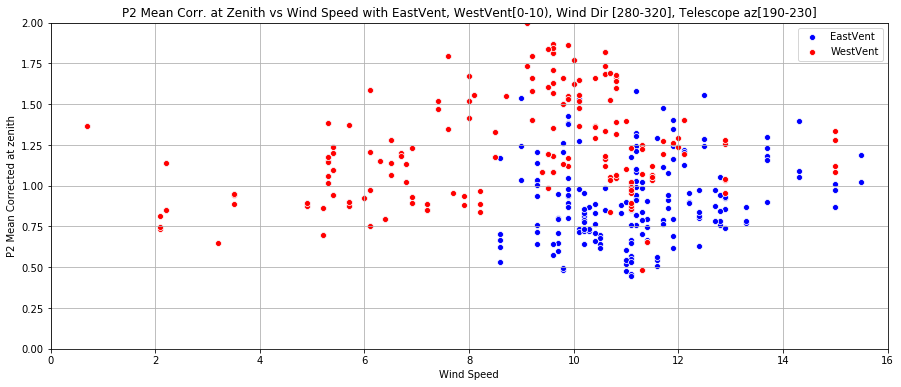

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20_AM_IQ_zenith.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 0) & (df['eastVent'] < 10) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=190) & (df['ecs_az'] <=230)]

filtered_df_west = df[(df['westVent'] >= 0) & (df['westVent'] < 10) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=190) & (df['ecs_az'] <=230)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean Corrected at zenith')
plt.title('P2 Mean Corr. at Zenith vs Wind Speed with EastVent, WestVent[0-10), Wind Dir [280-320], Telescope az[190-230]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

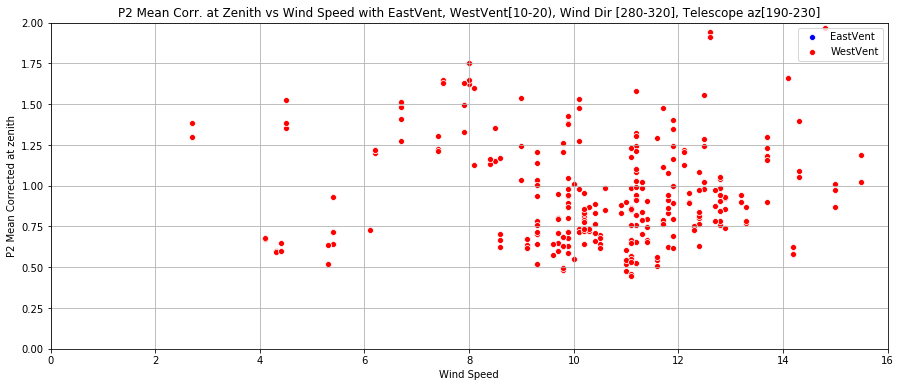

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20_AM_IQ_zenith.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 10) & (df['eastVent'] < 20) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=190) & (df['ecs_az'] <=230)]

filtered_df_west = df[(df['westVent'] >= 10) & (df['westVent'] < 20) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=190) & (df['ecs_az'] <=230)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean Corrected at zenith')
plt.title('P2 Mean Corr. at Zenith vs Wind Speed with EastVent, WestVent[10-20), Wind Dir [280-320], Telescope az[190-230]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

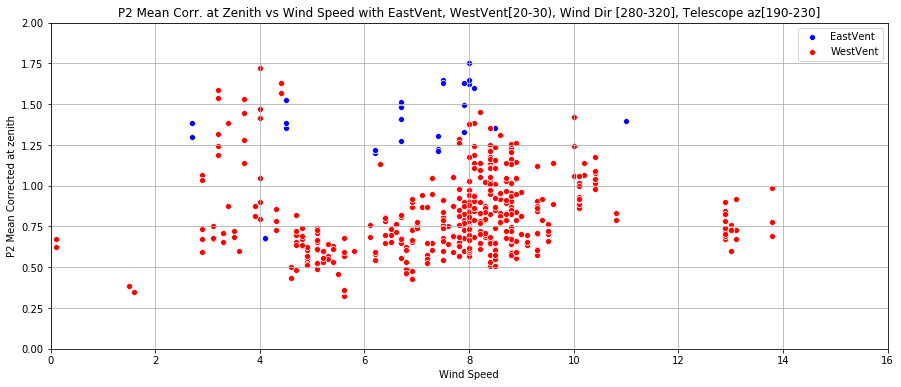

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20_AM_IQ_zenith.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 20) & (df['eastVent'] < 30) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=190) & (df['ecs_az'] <=230)]

filtered_df_west = df[(df['westVent'] >= 20) & (df['westVent'] < 30) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=190) & (df['ecs_az'] <=230)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean Corrected at zenith')
plt.title('P2 Mean Corr. at Zenith vs Wind Speed with EastVent, WestVent[20-30), Wind Dir [280-320], Telescope az[190-230]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

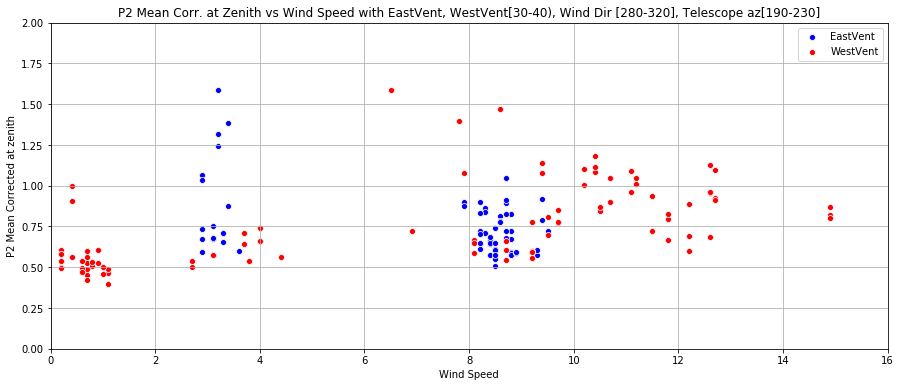

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20_AM_IQ_zenith.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 30) & (df['eastVent'] < 40) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=190) & (df['ecs_az'] <=230)]

filtered_df_west = df[(df['westVent'] >= 30) & (df['westVent'] < 40) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=190) & (df['ecs_az'] <=230)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean Corrected at zenith')
plt.title('P2 Mean Corr. at Zenith vs Wind Speed with EastVent, WestVent[30-40), Wind Dir [280-320], Telescope az[190-230]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

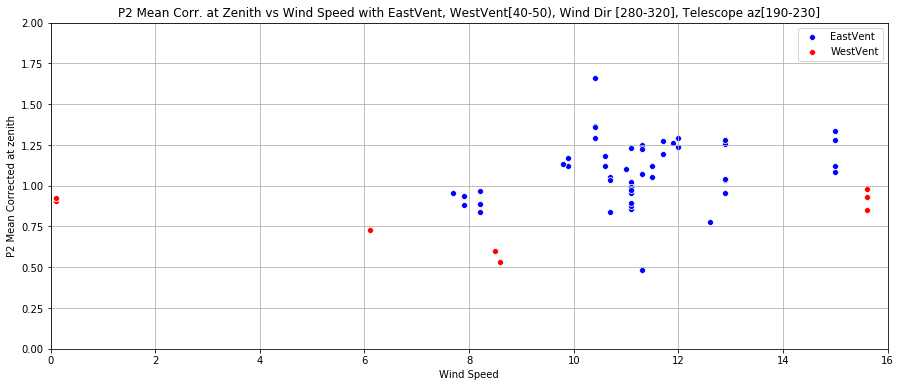

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20_AM_IQ_zenith.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 40) & (df['eastVent'] < 50) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=190) & (df['ecs_az'] <=230)]

filtered_df_west = df[(df['westVent'] >= 40) & (df['westVent'] < 50) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=190) & (df['ecs_az'] <=230)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean Corrected at zenith')
plt.title('P2 Mean Corr. at Zenith vs Wind Speed with EastVent, WestVent[40-50), Wind Dir [280-320], Telescope az[190-230]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

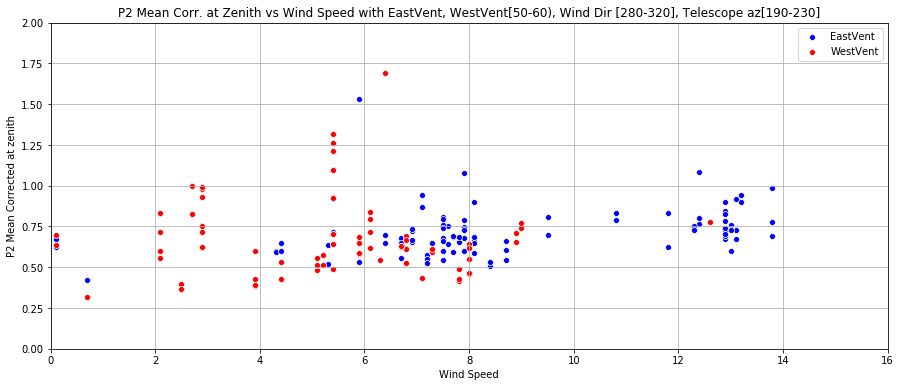

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20_AM_IQ_zenith.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 50) & (df['eastVent'] < 60) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=190) & (df['ecs_az'] <=230)]

filtered_df_west = df[(df['westVent'] >= 50) & (df['westVent'] < 60) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=190) & (df['ecs_az'] <=230)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean Corrected at zenith')
plt.title('P2 Mean Corr. at Zenith vs Wind Speed with EastVent, WestVent[50-60), Wind Dir [280-320], Telescope az[190-230]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

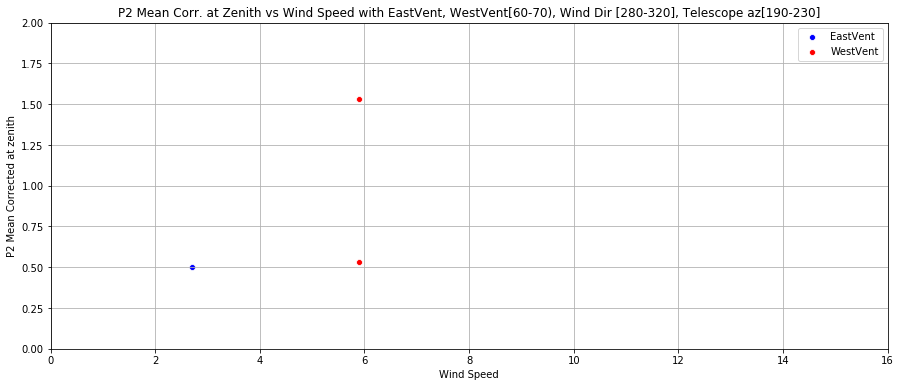

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20_AM_IQ_zenith.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 60) & (df['eastVent'] < 70) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=190) & (df['ecs_az'] <=230)]

filtered_df_west = df[(df['westVent'] >= 60) & (df['westVent'] < 70) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=190) & (df['ecs_az'] <=230)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean Corrected at zenith')
plt.title('P2 Mean Corr. at Zenith vs Wind Speed with EastVent, WestVent[60-70), Wind Dir [280-320], Telescope az[190-230]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

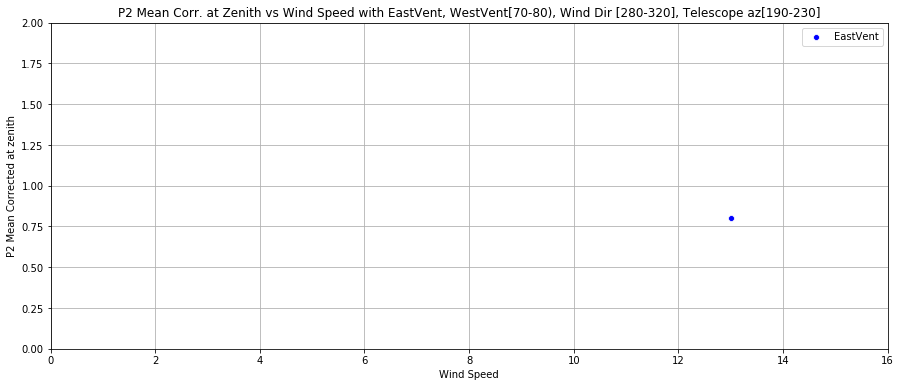

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20_AM_IQ_zenith.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 70) & (df['eastVent'] < 80) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=190) & (df['ecs_az'] <=230)]

filtered_df_west = df[(df['westVent'] >= 70) & (df['westVent'] < 80) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=190) & (df['ecs_az'] <=230)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean Corrected at zenith')
plt.title('P2 Mean Corr. at Zenith vs Wind Speed with EastVent, WestVent[70-80), Wind Dir [280-320], Telescope az[190-230]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

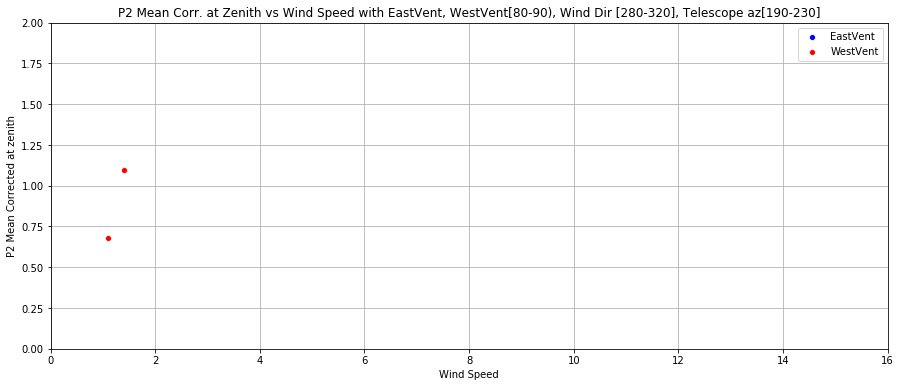

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20_AM_IQ_zenith.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 80) & (df['eastVent'] < 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=190) & (df['ecs_az'] <=230)]

filtered_df_west = df[(df['westVent'] >= 80) & (df['westVent'] < 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=190) & (df['ecs_az'] <=230)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean Corrected at zenith')
plt.title('P2 Mean Corr. at Zenith vs Wind Speed with EastVent, WestVent[80-90), Wind Dir [280-320], Telescope az[190-230]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

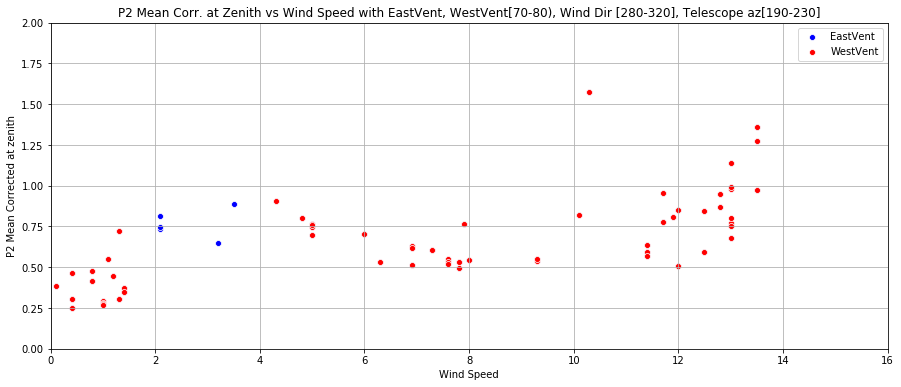

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20_AM_IQ_zenith.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 90) & (df['eastVent'] <= 100) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=190) & (df['ecs_az'] <=230)]

filtered_df_west = df[(df['westVent'] >= 90) & (df['westVent'] <= 100) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=190) & (df['ecs_az'] <=230)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='IQ_zenith', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean Corrected at zenith')
plt.title('P2 Mean Corr. at Zenith vs Wind Speed with EastVent, WestVent[70-80), Wind Dir [280-320], Telescope az[190-230]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

## Telescope az - wind direction degrees. East and West Ventgate [0-10]

### Python code to plot telescope azimuth minus wind direction in 30 degree intervals on the X-axis, and P2 Mean corrected at zenith on the Y-axis. Additionally, I have included the three wind categories (0-5 m/s, 5-10 m/s, and >10 m/s) with labels, and the option to select the eastVent and westVent gate openings. 

#### East and West Ventgate [0-10]

Archivo 'p2mean_az_el_wind20_AM_IQ_zenith.csv' leído exitosamente.
Primeras filas del DataFrame:
   id                 date      hour     datetime  ecs_az  topshut  botshut  \
0   0  2022-01-01 00:00:00  00:58:54  44562.04091   172.0    103.7      9.6   
1   1  2022-01-01 00:00:00  01:06:26  44562.04614   175.7    103.7      9.6   
2   2  2022-01-01 00:00:00  01:07:15  44562.04671   175.7    103.7      9.6   
3   4  2022-01-01 00:00:00  01:08:55  44562.04787   175.7    103.7      9.6   
4   7  2022-01-01 00:00:00  02:34:36  44562.10737   282.0    103.7      9.6   

   eastVent  westVent  pwfs2_see  ...  p2_mean  Error   Adjusted Timestamp  \
0      30.0      30.0       1.92  ...     1.92   60.0  2022-01-01 00:58:54   
1      30.0      30.0       0.79  ...     0.79   60.0  2022-01-01 01:06:26   
2      30.0      30.0       0.86  ...     0.91   60.0  2022-01-01 01:07:15   
3      30.0      30.0       0.86  ...     0.84   60.0  2022-01-01 01:09:46   
4      30.0      30.0       0.48  ... 

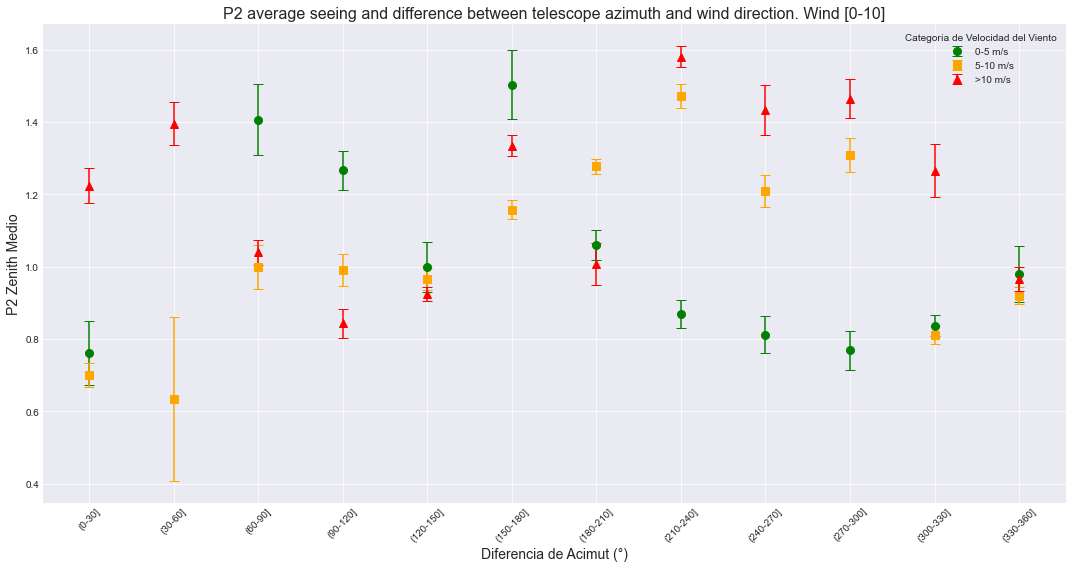

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Configuración de estilo de los gráficos
plt.style.use('seaborn-darkgrid')

def trazar_scatter_con_error_ordenado(
    archivo_csv='p2mean_az_el_wind20_AM_IQ_zenith.csv',
    eastVent_min=0,
    eastVent_max=10,
    westVent_min=0,
    westVent_max=10
):
    """
    Trazar un gráfico de dispersión (scatter plot) de la diferencia de acimut entre el telescopio y la dirección del viento
    en intervalos de 30 grados, categorizando por velocidad del viento y
    filtrando por los rangos numéricos de las aberturas de las compuertas eastVent y westVent.
    Incluye barras de error para el IQ_zenith y asegura el orden correcto de los intervalos en el eje X.
    
    Parámetros:
    - archivo_csv: Nombre del archivo CSV a leer.
    - eastVent_min: Valor mínimo para filtrar 'eastVent'.
    - eastVent_max: Valor máximo para filtrar 'eastVent'.
    - westVent_min: Valor mínimo para filtrar 'westVent'.
    - westVent_max: Valor máximo para filtrar 'westVent'.
    """
    
    # Leer el archivo CSV
    try:
        df = pd.read_csv(archivo_csv)
        print(f"Archivo '{archivo_csv}' leído exitosamente.")
    except FileNotFoundError:
        print(f"El archivo '{archivo_csv}' no se encontró.")
        return
    except Exception as e:
        print(f"Ocurrió un error al leer el archivo: {e}")
        return
    
    # Mostrar las primeras filas para verificar las columnas
    print("Primeras filas del DataFrame:")
    print(df.head())
    
    # Verificar si las columnas necesarias existen
    columnas_necesarias = ['ecs_az', 'windDir', 'IQ_zenith', 'windSpeed', 'eastVent', 'westVent']
    for columna in columnas_necesarias:
        if columna not in df.columns:
            print(f"Columna '{columna}' no encontrada en el archivo CSV.")
            return
    
    # Aplicar los filtros de eastVent y westVent
    print(f"Filtrando 'eastVent' entre {eastVent_min} y {eastVent_max}")
    print(f"Filtrando 'westVent' entre {westVent_min} y {westVent_max}")
    df_filtered = df.loc[
        (df['eastVent'] >= eastVent_min) & (df['eastVent'] < eastVent_max) &
        (df['westVent'] >= westVent_min) & (df['westVent'] < westVent_max)
    ].copy()
    print(f"Cantidad de filas después de filtrar 'eastVent' y 'westVent': {len(df_filtered)}")
    
    if df_filtered.empty:
        print("No hay datos después de aplicar los filtros. Verifica los rangos de filtrado.")
        return
    
    # Calcular la diferencia entre 'ecs_az' y 'windDir'
    df_filtered['delta_az'] = (df_filtered['ecs_az'] - df_filtered['windDir']) % 360
    print("Cálculo de 'delta_az' completado.")
    
    # Definir los intervalos de 30 grados en el orden correcto
    bins = np.arange(0, 390, 30)  # 0 a 360 inclusive
    interval_labels = ['(0-30]', '(30-60]', '(60-90]', '(90-120]', '(120-150]', '(150-180]',
                      '(180-210]', '(210-240]', '(240-270]', '(270-300]', '(300-330]', '(330-360]']
    
    # Asignar cada delta_az a un intervalo
    df_filtered['bin_delta_az'] = pd.cut(
        df_filtered['delta_az'],
        bins=bins,
        labels=interval_labels,
        right=True,
        include_lowest=True
    )
    print("Asignación de 'bin_delta_az' completada.")
    
    # Definir el orden de las categorías
    df_filtered['bin_delta_az'] = pd.Categorical(
        df_filtered['bin_delta_az'],
        categories=interval_labels,
        ordered=True
    )
    print("Orden de 'bin_delta_az' establecido correctamente.")
    
    # Crear una columna para clasificar la velocidad del viento
    df_filtered['wind_speed_category'] = pd.cut(
        df_filtered['windSpeed'],
        bins=[-1, 5, 10, float('inf')],
        labels=['0-5 m/s', '5-10 m/s', '>10 m/s']
    )
    print("Categoría de velocidad del viento asignada.")
    
    # Verificar categorías únicas
    print("Categorías de velocidad del viento presentes:")
    print(df_filtered['wind_speed_category'].unique())
    
    # Agrupar los datos por bin de delta_az y categoría de viento, calculando la media y el error estándar de IQ_zenith
    df_grouped = df_filtered.groupby(['bin_delta_az', 'wind_speed_category']).agg(
        mean_IQ_zenith=('IQ_zenith', 'mean'),
        std_IQ_zenith=('IQ_zenith', 'std'),
        count=('IQ_zenith', 'count')
    ).reset_index()
    
    # Calcular el error estándar. ErrStd= s/n^(0.5). s:desviacion estandard, n:numero de datos, ErrStd:Error estandard
    df_grouped['error_IQ_zenith'] = df_grouped['std_IQ_zenith'] / df_grouped['count']**0.5
    print("Cálculo de la media y error estándar completado.")
    
    # Mostrar el DataFrame agrupado para verificar
    print("Datos agrupados (media de 'IQ_zenith' y error estándar):")
    print(df_grouped)
    
    # Configurar el gráfico
    fig, ax = plt.subplots(figsize=(15, 8))
    
    # Definir colores y marcadores para cada categoría de velocidad del viento
    colores = {
        '0-5 m/s': 'green',
        '5-10 m/s': 'orange',
        '>10 m/s': 'red'
    }
    
    marcadores = {
        '0-5 m/s': 'o',
        '5-10 m/s': 's',
        '>10 m/s': '^'
    }
    
    # Ordenar los intervalos en el DataFrame agrupado según el orden definido
    df_grouped['bin_delta_az'] = pd.Categorical(
        df_grouped['bin_delta_az'],
        categories=interval_labels,
        ordered=True
    )
    df_grouped = df_grouped.sort_values('bin_delta_az')
    
    # Iterar sobre cada categoría de velocidad del viento y trazar los puntos con barras de error
    for categoria in ['0-5 m/s', '5-10 m/s', '>10 m/s']:
        df_categoria = df_grouped[df_grouped['wind_speed_category'] == categoria]
        if not df_categoria.empty:
            ax.errorbar(
                x=df_categoria['bin_delta_az'].cat.codes,  # Usar códigos de categorías para el eje X
                y=df_categoria['mean_IQ_zenith'],
                yerr=df_categoria['error_IQ_zenith'],
                fmt=marcadores[categoria],
                color=colores[categoria],
                ecolor=colores[categoria],
                capsize=5,
                label=categoria,
                linestyle='None',  # Sin línea que conecte los puntos
                markersize=8
            )
        else:
            print(f"Categoría '{categoria}' no tiene datos y no se trazará.")
    
    # Configurar etiquetas y título
    ax.set_xlabel('Diferencia de Acimut (°)', fontsize=14)
    ax.set_ylabel('P2 Zenith Medio', fontsize=14)
    ax.set_title('P2 average seeing and difference between telescope azimuth and wind direction. Wind [0-10]', fontsize=16)
    
    # Configurar las posiciones del eje X y sus etiquetas
    ax.set_xticks(range(len(interval_labels)))
    ax.set_xticklabels(interval_labels, rotation=45)
    
    # Añadir leyenda
    ax.legend(title='Categoría de Velocidad del Viento')
    
    # Ajustar layout para mejor visualización
    plt.tight_layout()
    
    # Mostrar el gráfico
    plt.show()

# Ejemplo de uso:
trazar_scatter_con_error_ordenado(
    archivo_csv='p2mean_az_el_wind20_AM_IQ_zenith.csv',
    eastVent_min=0,   # Ajusta estos valores según tus necesidades
    eastVent_max=10,
    westVent_min=0,
    westVent_max=10
)


#### East and West Ventgate [11-50]

Archivo 'p2mean_az_el_wind20_AM_IQ_zenith.csv' leído exitosamente.
Primeras filas del DataFrame:
   id                 date      hour     datetime  ecs_az  topshut  botshut  \
0   0  2022-01-01 00:00:00  00:58:54  44562.04091   172.0    103.7      9.6   
1   1  2022-01-01 00:00:00  01:06:26  44562.04614   175.7    103.7      9.6   
2   2  2022-01-01 00:00:00  01:07:15  44562.04671   175.7    103.7      9.6   
3   4  2022-01-01 00:00:00  01:08:55  44562.04787   175.7    103.7      9.6   
4   7  2022-01-01 00:00:00  02:34:36  44562.10737   282.0    103.7      9.6   

   eastVent  westVent  pwfs2_see  ...  p2_mean  Error   Adjusted Timestamp  \
0      30.0      30.0       1.92  ...     1.92   60.0  2022-01-01 00:58:54   
1      30.0      30.0       0.79  ...     0.79   60.0  2022-01-01 01:06:26   
2      30.0      30.0       0.86  ...     0.91   60.0  2022-01-01 01:07:15   
3      30.0      30.0       0.86  ...     0.84   60.0  2022-01-01 01:09:46   
4      30.0      30.0       0.48  ... 

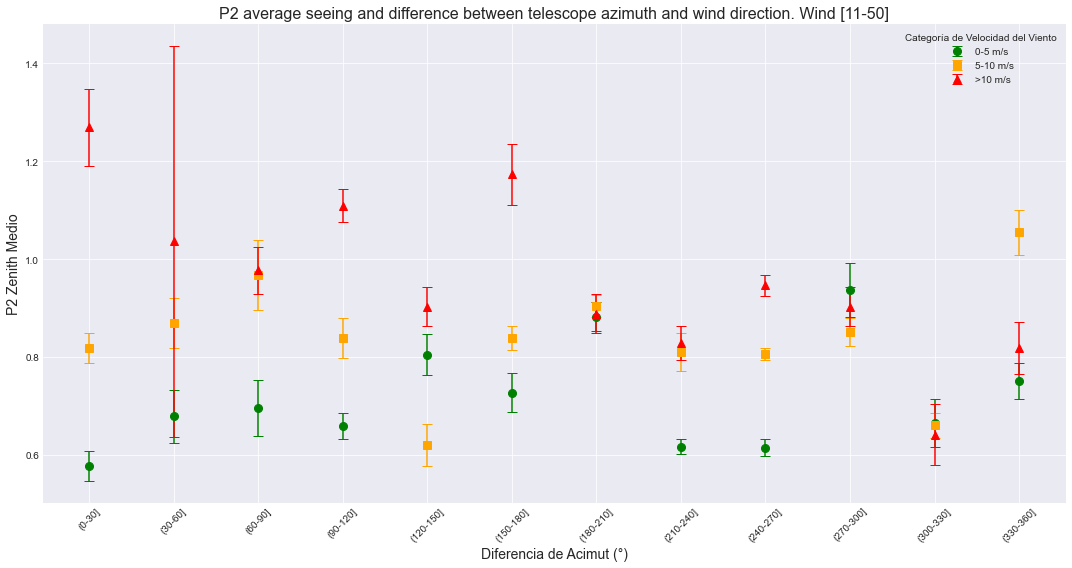

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Configuración de estilo de los gráficos
plt.style.use('seaborn-darkgrid')

def trazar_scatter_con_error_ordenado(
    archivo_csv='p2mean_az_el_wind20_AM_IQ_zenith.csv',
    eastVent_min=11,
    eastVent_max=50,
    westVent_min=11,
    westVent_max=50
):
    """
    Trazar un gráfico de dispersión (scatter plot) de la diferencia de acimut entre el telescopio y la dirección del viento
    en intervalos de 30 grados, categorizando por velocidad del viento y
    filtrando por los rangos numéricos de las aberturas de las compuertas eastVent y westVent.
    Incluye barras de error para el IQ_zenith y asegura el orden correcto de los intervalos en el eje X.
    
    Parámetros:
    - archivo_csv: Nombre del archivo CSV a leer.
    - eastVent_min: Valor mínimo para filtrar 'eastVent'.
    - eastVent_max: Valor máximo para filtrar 'eastVent'.
    - westVent_min: Valor mínimo para filtrar 'westVent'.
    - westVent_max: Valor máximo para filtrar 'westVent'.
    """
    
    # Leer el archivo CSV
    try:
        df = pd.read_csv(archivo_csv)
        print(f"Archivo '{archivo_csv}' leído exitosamente.")
    except FileNotFoundError:
        print(f"El archivo '{archivo_csv}' no se encontró.")
        return
    except Exception as e:
        print(f"Ocurrió un error al leer el archivo: {e}")
        return
    
    # Mostrar las primeras filas para verificar las columnas
    print("Primeras filas del DataFrame:")
    print(df.head())
    
    # Verificar si las columnas necesarias existen
    columnas_necesarias = ['ecs_az', 'windDir', 'IQ_zenith', 'windSpeed', 'eastVent', 'westVent']
    for columna in columnas_necesarias:
        if columna not in df.columns:
            print(f"Columna '{columna}' no encontrada en el archivo CSV.")
            return
    
    # Aplicar los filtros de eastVent y westVent
    print(f"Filtrando 'eastVent' entre {eastVent_min} y {eastVent_max}")
    print(f"Filtrando 'westVent' entre {westVent_min} y {westVent_max}")
    df_filtered = df.loc[
        (df['eastVent'] >= eastVent_min) & (df['eastVent'] < eastVent_max) &
        (df['westVent'] >= westVent_min) & (df['westVent'] < westVent_max)
    ].copy()
    print(f"Cantidad de filas después de filtrar 'eastVent' y 'westVent': {len(df_filtered)}")
    
    if df_filtered.empty:
        print("No hay datos después de aplicar los filtros. Verifica los rangos de filtrado.")
        return
    
    # Calcular la diferencia entre 'ecs_az' y 'windDir'
    df_filtered['delta_az'] = (df_filtered['ecs_az'] - df_filtered['windDir']) % 360
    print("Cálculo de 'delta_az' completado.")
    
    # Definir los intervalos de 30 grados en el orden correcto
    bins = np.arange(0, 390, 30)  # 0 a 360 inclusive
    interval_labels = ['(0-30]', '(30-60]', '(60-90]', '(90-120]', '(120-150]', '(150-180]',
                      '(180-210]', '(210-240]', '(240-270]', '(270-300]', '(300-330]', '(330-360]']
    
    # Asignar cada delta_az a un intervalo
    df_filtered['bin_delta_az'] = pd.cut(
        df_filtered['delta_az'],
        bins=bins,
        labels=interval_labels,
        right=True,
        include_lowest=True
    )
    print("Asignación de 'bin_delta_az' completada.")
    
    # Definir el orden de las categorías
    df_filtered['bin_delta_az'] = pd.Categorical(
        df_filtered['bin_delta_az'],
        categories=interval_labels,
        ordered=True
    )
    print("Orden de 'bin_delta_az' establecido correctamente.")
    
    # Crear una columna para clasificar la velocidad del viento
    df_filtered['wind_speed_category'] = pd.cut(
        df_filtered['windSpeed'],
        bins=[-1, 5, 10, float('inf')],
        labels=['0-5 m/s', '5-10 m/s', '>10 m/s']
    )
    print("Categoría de velocidad del viento asignada.")
    
    # Verificar categorías únicas
    print("Categorías de velocidad del viento presentes:")
    print(df_filtered['wind_speed_category'].unique())
    
    # Agrupar los datos por bin de delta_az y categoría de viento, calculando la media y el error estándar de IQ_zenith
    df_grouped = df_filtered.groupby(['bin_delta_az', 'wind_speed_category']).agg(
        mean_IQ_zenith=('IQ_zenith', 'mean'),
        std_IQ_zenith=('IQ_zenith', 'std'),
        count=('IQ_zenith', 'count')
    ).reset_index()
    
    # Calcular el error estándar. ErrStd= s/n^(0.5). s:desviacion estandard, n:numero de datos, ErrStd:Error estandard
    df_grouped['error_IQ_zenith'] = df_grouped['std_IQ_zenith'] / df_grouped['count']**0.5
    print("Cálculo de la media y error estándar completado.")
    
    # Mostrar el DataFrame agrupado para verificar
    print("Datos agrupados (media de 'IQ_zenith' y error estándar):")
    print(df_grouped)
    
    # Configurar el gráfico
    fig, ax = plt.subplots(figsize=(15, 8))
    
    # Definir colores y marcadores para cada categoría de velocidad del viento
    colores = {
        '0-5 m/s': 'green',
        '5-10 m/s': 'orange',
        '>10 m/s': 'red'
    }
    
    marcadores = {
        '0-5 m/s': 'o',
        '5-10 m/s': 's',
        '>10 m/s': '^'
    }
    
    # Ordenar los intervalos en el DataFrame agrupado según el orden definido
    df_grouped['bin_delta_az'] = pd.Categorical(
        df_grouped['bin_delta_az'],
        categories=interval_labels,
        ordered=True
    )
    df_grouped = df_grouped.sort_values('bin_delta_az')
    
    # Iterar sobre cada categoría de velocidad del viento y trazar los puntos con barras de error
    for categoria in ['0-5 m/s', '5-10 m/s', '>10 m/s']:
        df_categoria = df_grouped[df_grouped['wind_speed_category'] == categoria]
        if not df_categoria.empty:
            ax.errorbar(
                x=df_categoria['bin_delta_az'].cat.codes,  # Usar códigos de categorías para el eje X
                y=df_categoria['mean_IQ_zenith'],
                yerr=df_categoria['error_IQ_zenith'],
                fmt=marcadores[categoria],
                color=colores[categoria],
                ecolor=colores[categoria],
                capsize=5,
                label=categoria,
                linestyle='None',  # Sin línea que conecte los puntos
                markersize=8
            )
        else:
            print(f"Categoría '{categoria}' no tiene datos y no se trazará.")
    
    # Configurar etiquetas y título
    ax.set_xlabel('Diferencia de Acimut (°)', fontsize=14)
    ax.set_ylabel('P2 Zenith Medio', fontsize=14)
    ax.set_title('P2 average seeing and difference between telescope azimuth and wind direction. Wind [11-50]', fontsize=16)
    
    # Configurar las posiciones del eje X y sus etiquetas
    ax.set_xticks(range(len(interval_labels)))
    ax.set_xticklabels(interval_labels, rotation=45)
    
    # Añadir leyenda
    ax.legend(title='Categoría de Velocidad del Viento')
    
    # Ajustar layout para mejor visualización
    plt.tight_layout()
    
    # Mostrar el gráfico
    plt.show()

# Ejemplo de uso:
trazar_scatter_con_error_ordenado(
    archivo_csv='p2mean_az_el_wind20_AM_IQ_zenith.csv',
    eastVent_min=11,   # Ajusta estos valores según tus necesidades
    eastVent_max=50,
    westVent_min=11,
    westVent_max=50
)


#### East and West Ventgate (50-100]

Archivo 'p2mean_az_el_wind20_AM_IQ_zenith.csv' leído exitosamente.
Primeras filas del DataFrame:
   id                 date      hour     datetime  ecs_az  topshut  botshut  \
0   0  2022-01-01 00:00:00  00:58:54  44562.04091   172.0    103.7      9.6   
1   1  2022-01-01 00:00:00  01:06:26  44562.04614   175.7    103.7      9.6   
2   2  2022-01-01 00:00:00  01:07:15  44562.04671   175.7    103.7      9.6   
3   4  2022-01-01 00:00:00  01:08:55  44562.04787   175.7    103.7      9.6   
4   7  2022-01-01 00:00:00  02:34:36  44562.10737   282.0    103.7      9.6   

   eastVent  westVent  pwfs2_see  ...  p2_mean  Error   Adjusted Timestamp  \
0      30.0      30.0       1.92  ...     1.92   60.0  2022-01-01 00:58:54   
1      30.0      30.0       0.79  ...     0.79   60.0  2022-01-01 01:06:26   
2      30.0      30.0       0.86  ...     0.91   60.0  2022-01-01 01:07:15   
3      30.0      30.0       0.86  ...     0.84   60.0  2022-01-01 01:09:46   
4      30.0      30.0       0.48  ... 

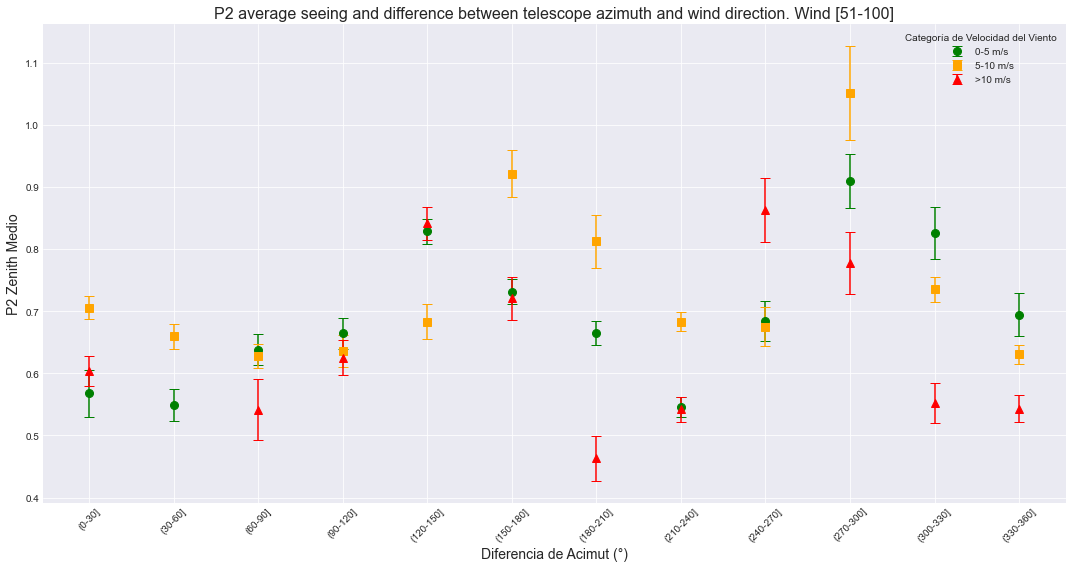

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Configuración de estilo de los gráficos
plt.style.use('seaborn-darkgrid')

def trazar_scatter_con_error_ordenado(
    archivo_csv='p2mean_az_el_wind20_AM_IQ_zenith.csv',
    eastVent_min=51,
    eastVent_max=100,
    westVent_min=51,
    westVent_max=100
):
    """
    Trazar un gráfico de dispersión (scatter plot) de la diferencia de acimut entre el telescopio y la dirección del viento
    en intervalos de 30 grados, categorizando por velocidad del viento y
    filtrando por los rangos numéricos de las aberturas de las compuertas eastVent y westVent.
    Incluye barras de error para el IQ_zenith y asegura el orden correcto de los intervalos en el eje X.
    
    Parámetros:
    - archivo_csv: Nombre del archivo CSV a leer.
    - eastVent_min: Valor mínimo para filtrar 'eastVent'.
    - eastVent_max: Valor máximo para filtrar 'eastVent'.
    - westVent_min: Valor mínimo para filtrar 'westVent'.
    - westVent_max: Valor máximo para filtrar 'westVent'.
    """
    
    # Leer el archivo CSV
    try:
        df = pd.read_csv(archivo_csv)
        print(f"Archivo '{archivo_csv}' leído exitosamente.")
    except FileNotFoundError:
        print(f"El archivo '{archivo_csv}' no se encontró.")
        return
    except Exception as e:
        print(f"Ocurrió un error al leer el archivo: {e}")
        return
    
    # Mostrar las primeras filas para verificar las columnas
    print("Primeras filas del DataFrame:")
    print(df.head())
    
    # Verificar si las columnas necesarias existen
    columnas_necesarias = ['ecs_az', 'windDir', 'IQ_zenith', 'windSpeed', 'eastVent', 'westVent']
    for columna in columnas_necesarias:
        if columna not in df.columns:
            print(f"Columna '{columna}' no encontrada en el archivo CSV.")
            return
    
    # Aplicar los filtros de eastVent y westVent
    print(f"Filtrando 'eastVent' entre {eastVent_min} y {eastVent_max}")
    print(f"Filtrando 'westVent' entre {westVent_min} y {westVent_max}")
    df_filtered = df.loc[
        (df['eastVent'] >= eastVent_min) & (df['eastVent'] < eastVent_max) &
        (df['westVent'] >= westVent_min) & (df['westVent'] < westVent_max)
    ].copy()
    print(f"Cantidad de filas después de filtrar 'eastVent' y 'westVent': {len(df_filtered)}")
    
    if df_filtered.empty:
        print("No hay datos después de aplicar los filtros. Verifica los rangos de filtrado.")
        return
    
    # Calcular la diferencia entre 'ecs_az' y 'windDir'
    df_filtered['delta_az'] = (df_filtered['ecs_az'] - df_filtered['windDir']) % 360
    print("Cálculo de 'delta_az' completado.")
    
    # Definir los intervalos de 30 grados en el orden correcto
    bins = np.arange(0, 390, 30)  # 0 a 360 inclusive
    interval_labels = ['(0-30]', '(30-60]', '(60-90]', '(90-120]', '(120-150]', '(150-180]',
                      '(180-210]', '(210-240]', '(240-270]', '(270-300]', '(300-330]', '(330-360]']
    
    # Asignar cada delta_az a un intervalo
    df_filtered['bin_delta_az'] = pd.cut(
        df_filtered['delta_az'],
        bins=bins,
        labels=interval_labels,
        right=True,
        include_lowest=True
    )
    print("Asignación de 'bin_delta_az' completada.")
    
    # Definir el orden de las categorías
    df_filtered['bin_delta_az'] = pd.Categorical(
        df_filtered['bin_delta_az'],
        categories=interval_labels,
        ordered=True
    )
    print("Orden de 'bin_delta_az' establecido correctamente.")
    
    # Crear una columna para clasificar la velocidad del viento
    df_filtered['wind_speed_category'] = pd.cut(
        df_filtered['windSpeed'],
        bins=[-1, 5, 10, float('inf')],
        labels=['0-5 m/s', '5-10 m/s', '>10 m/s']
    )
    print("Categoría de velocidad del viento asignada.")
    
    # Verificar categorías únicas
    print("Categorías de velocidad del viento presentes:")
    print(df_filtered['wind_speed_category'].unique())
    
    # Agrupar los datos por bin de delta_az y categoría de viento, calculando la media y el error estándar de IQ_zenith
    df_grouped = df_filtered.groupby(['bin_delta_az', 'wind_speed_category']).agg(
        mean_IQ_zenith=('IQ_zenith', 'mean'),
        std_IQ_zenith=('IQ_zenith', 'std'),
        count=('IQ_zenith', 'count')
    ).reset_index()
    
    # Calcular el error estándar. ErrStd= s/n^(0.5). s:desviacion estandard, n:numero de datos, ErrStd:Error estandard.
    df_grouped['error_IQ_zenith'] = df_grouped['std_IQ_zenith'] / df_grouped['count']**0.5
    print("Cálculo de la media y error estándar completado.")
    
    # Mostrar el DataFrame agrupado para verificar
    print("Datos agrupados (media de 'IQ_zenith' y error estándar):")
    print(df_grouped)
    
    # Configurar el gráfico
    fig, ax = plt.subplots(figsize=(15, 8))
    
    # Definir colores y marcadores para cada categoría de velocidad del viento
    colores = {
        '0-5 m/s': 'green',
        '5-10 m/s': 'orange',
        '>10 m/s': 'red'
    }
    
    marcadores = {
        '0-5 m/s': 'o',
        '5-10 m/s': 's',
        '>10 m/s': '^'
    }
    
    # Ordenar los intervalos en el DataFrame agrupado según el orden definido
    df_grouped['bin_delta_az'] = pd.Categorical(
        df_grouped['bin_delta_az'],
        categories=interval_labels,
        ordered=True
    )
    df_grouped = df_grouped.sort_values('bin_delta_az')
    
    # Iterar sobre cada categoría de velocidad del viento y trazar los puntos con barras de error
    for categoria in ['0-5 m/s', '5-10 m/s', '>10 m/s']:
        df_categoria = df_grouped[df_grouped['wind_speed_category'] == categoria]
        if not df_categoria.empty:
            ax.errorbar(
                x=df_categoria['bin_delta_az'].cat.codes,  # Usar códigos de categorías para el eje X
                y=df_categoria['mean_IQ_zenith'],
                yerr=df_categoria['error_IQ_zenith'],
                fmt=marcadores[categoria],
                color=colores[categoria],
                ecolor=colores[categoria],
                capsize=5,
                label=categoria,
                linestyle='None',  # Sin línea que conecte los puntos
                markersize=8
            )
        else:
            print(f"Categoría '{categoria}' no tiene datos y no se trazará.")
    
    # Configurar etiquetas y título
    ax.set_xlabel('Diferencia de Acimut (°)', fontsize=14)
    ax.set_ylabel('P2 Zenith Medio', fontsize=14)
    ax.set_title('P2 average seeing and difference between telescope azimuth and wind direction. Wind [51-100]', fontsize=16)
    
    # Configurar las posiciones del eje X y sus etiquetas
    ax.set_xticks(range(len(interval_labels)))
    ax.set_xticklabels(interval_labels, rotation=45)
    
    # Añadir leyenda
    ax.legend(title='Categoría de Velocidad del Viento')
    
    # Ajustar layout para mejor visualización
    plt.tight_layout()
    
    # Mostrar el gráfico
    plt.show()

# Ejemplo de uso:
trazar_scatter_con_error_ordenado(
    archivo_csv='p2mean_az_el_wind20_AM_IQ_zenith.csv',
    eastVent_min=51,   # Ajusta estos valores según tus necesidades
    eastVent_max=100,
    westVent_min=51,
    westVent_max=100
)
